In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
from mlflow.models.signature import infer_signature

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from yellowbrick.classifier import ROCAUC

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_default = pd.read_csv('../data/processed/dataset_model.csv')
df_default

Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah     Vol. Perubahan%  \
0   2025-07-04      3.67       3.68       3.71      3.65   91,14M     -0,27%   
1   2025-07-03      3.68       3.71       3.73      3.68  119,67M      0,00%   
2   2025-07-02      3.68       3.65       3.70      3.64  220,27M     -0,54%   
3   2025-07-01      3.70       3.78       3.79      3.67  212,37M     -1,07%   
4   2025-06-30      3.74       3.84       3.84      3.73  271,93M     -2,35%   
5   2025-06-26      3.83       3.78       3.83      3.75  171,43M      1,86%   
6   2025-06-25      3.76       3.83       3.83      3.73  164,26M     -0,53%   
7   2025-06-24      3.78       3.82       3.90      3.77  281,59M      1,61%   
8   2025-06-23      3.72       3.73       3.75      3.66  222,07M     -1,85%   
9   2025-06-20      3.79       3.74       3.84      3.74  516,18M     -0,26%   
10  2025-06-19      3.80       3.90       3.92      3.80  355,41M     -3,55%   
11  2025-06-18      3.94       3.95       3.96      3.90  140,88M     -0,51%   
12  2025-06-17      3.96       4.01       4.03      3.96  125,77M     -0,75%   
13  2025-06-16      3.99       3.98       4.01      3.96  155,45M     -0,25%   
14  2025-06-13      4.00       4.02       4.05      3.98  283,83M     -1,72%   
15  2025-06-12      4.07       4.07       4.10      4.06  113,85M      0,00%   
16  2025-06-11      4.07       4.13       4.14      4.06  196,56M     -1,93%   
17  2025-06-10      4.15       4.10       4.16      4.10  179,83M      1,22%   
18  2025-06-05      4.10       4.11       4.14      4.05  230,13M      0,49%   
19  2025-06-04      4.08       4.23       4.23      4.08  279,76M     -2,86%   
20  2025-06-03      4.20       4.21       4.23      4.12  277,90M      0,00%   
21  2025-06-02      4.20       4.36       4.39      4.20  389,54M     -5,62%   
22  2025-05-28      4.45       4.36       4.45      4.32  466,13M      1,83%   
23  2025-05-27      4.37       4.32       4.37      4.28  180,03M      1,16%   
24  2025-05-26      4.32       4.35       4.35      4.26  149,42M     -0,69%   
25  2025-05-23      4.35       4.37       4.37      4.33  187,46M      1,16%   
26  2025-05-22      4.30       4.28       4.31      4.24  208,29M      0,94%   
27  2025-05-21      4.26       4.21       4.31      4.21  256,02M      1,19%   
28  2025-05-20      4.21       4.23       4.28      4.17  209,58M     -0,47%   
29  2025-05-19      4.23       4.23       4.26      4.20  145,94M     -0,47%   
30  2025-05-16      4.25       4.31       4.33      4.16  289,34M     -0,47%   
31  2025-05-15      4.27       4.14       4.31      4.13  537,15M      4,40%   
32  2025-05-14      4.09       4.00       4.09      3.96  461,64M      6,51%   
33  2025-05-09      3.84       3.81       3.84      3.76  147,64M      1,32%   
34  2025-05-08      3.79       3.91       3.96      3.78  224,12M     -3,07%   
35  2025-05-07      3.91       3.90       3.91      3.87  119,76M      0,77%   
36  2025-05-06      3.88       3.84       3.90      3.84  111,33M      0,52%   
37  2025-05-05      3.86       3.90       3.92      3.86  196,92M     -0,52%   
38  2025-05-02      3.88       3.92       3.92      3.85  205,63M      0,78%   

          date  avg_signed_sentiment  count_positive  count_negative  \
0   2025-07-04             -0.000960             4.0             3.0   
1   2025-07-03              0.052033             5.0             3.0   
2   2025-07-02             -0.007767             2.0             2.0   
3   2025-07-01             -0.018503             4.0             4.0   
4   2025-06-30             -0.124553             0.0             2.0   
5   2025-06-26              0.198789             1.0             0.0   
6   2025-06-25             -0.072154             0.0             1.0   
7   2025-06-24              0.000000             0.0             0.0   
8   2025-06-23             -0.374837             0.0             6.0   
9   2025-06-20             -0.111262             2.0             3.0   
10  2025-06-19

In [3]:
df_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tanggal               39 non-null     object 
 1   Terakhir              39 non-null     float64
 2   Pembukaan             39 non-null     float64
 3   Tertinggi             39 non-null     float64
 4   Terendah              39 non-null     float64
 5   Vol.                  39 non-null     object 
 6   Perubahan%            39 non-null     object 
 7   date                  39 non-null     object 
 8   avg_signed_sentiment  38 non-null     float64
 9   count_positive        38 non-null     float64
 10  count_negative        38 non-null     float64
 11  count_neutral         38 non-null     float64
 12  total_tweets          38 non-null     float64
dtypes: float64(9), object(4)
memory usage: 4.1+ KB


In [4]:
df_default.dropna(inplace=True)

In [5]:
df_default.drop(columns=['date'])

Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah     Vol. Perubahan%  \
0   2025-07-04      3.67       3.68       3.71      3.65   91,14M     -0,27%   
1   2025-07-03      3.68       3.71       3.73      3.68  119,67M      0,00%   
2   2025-07-02      3.68       3.65       3.70      3.64  220,27M     -0,54%   
3   2025-07-01      3.70       3.78       3.79      3.67  212,37M     -1,07%   
4   2025-06-30      3.74       3.84       3.84      3.73  271,93M     -2,35%   
5   2025-06-26      3.83       3.78       3.83      3.75  171,43M      1,86%   
6   2025-06-25      3.76       3.83       3.83      3.73  164,26M     -0,53%   
7   2025-06-24      3.78       3.82       3.90      3.77  281,59M      1,61%   
8   2025-06-23      3.72       3.73       3.75      3.66  222,07M     -1,85%   
9   2025-06-20      3.79       3.74       3.84      3.74  516,18M     -0,26%   
10  2025-06-19      3.80       3.90       3.92      3.80  355,41M     -3,55%   
11  2025-06-18      3.94       3.95       3.96      3.90  140,88M     -0,51%   
12  2025-06-17      3.96       4.01       4.03      3.96  125,77M     -0,75%   
13  2025-06-16      3.99       3.98       4.01      3.96  155,45M     -0,25%   
14  2025-06-13      4.00       4.02       4.05      3.98  283,83M     -1,72%   
15  2025-06-12      4.07       4.07       4.10      4.06  113,85M      0,00%   
16  2025-06-11      4.07       4.13       4.14      4.06  196,56M     -1,93%   
17  2025-06-10      4.15       4.10       4.16      4.10  179,83M      1,22%   
18  2025-06-05      4.10       4.11       4.14      4.05  230,13M      0,49%   
19  2025-06-04      4.08       4.23       4.23      4.08  279,76M     -2,86%   
20  2025-06-03      4.20       4.21       4.23      4.12  277,90M      0,00%   
21  2025-06-02      4.20       4.36       4.39      4.20  389,54M     -5,62%   
22  2025-05-28      4.45       4.36       4.45      4.32  466,13M      1,83%   
23  2025-05-27      4.37       4.32       4.37      4.28  180,03M      1,16%   
24  2025-05-26      4.32       4.35       4.35      4.26  149,42M     -0,69%   
25  2025-05-23      4.35       4.37       4.37      4.33  187,46M      1,16%   
26  2025-05-22      4.30       4.28       4.31      4.24  208,29M      0,94%   
27  2025-05-21      4.26       4.21       4.31      4.21  256,02M      1,19%   
28  2025-05-20      4.21       4.23       4.28      4.17  209,58M     -0,47%   
29  2025-05-19      4.23       4.23       4.26      4.20  145,94M     -0,47%   
30  2025-05-16      4.25       4.31       4.33      4.16  289,34M     -0,47%   
31  2025-05-15      4.27       4.14       4.31      4.13  537,15M      4,40%   
32  2025-05-14      4.09       4.00       4.09      3.96  461,64M      6,51%   
33  2025-05-09      3.84       3.81       3.84      3.76  147,64M      1,32%   
34  2025-05-08      3.79       3.91       3.96      3.78  224,12M     -3,07%   
35  2025-05-07      3.91       3.90       3.91      3.87  119,76M      0,77%   
36  2025-05-06      3.88       3.84       3.90      3.84  111,33M      0,52%   
37  2025-05-05      3.86       3.90       3.92      3.86  196,92M     -0,52%   

    avg_signed_sentiment  count_positive  count_negative  count_neutral  \
0              -0.000960             4.0             3.0           54.0   
1               0.052033             5.0             3.0           21.0   
2              -0.007767             2.0             2.0           16.0   
3              -0.018503             4.0             4.0           16.0   
4              -0.124553             0.0             2.0           12.0   
5               0.198789             1.0             0.0            4.0   
6              -0.072154             0.0             1.0           11.0   
7               0.000000             0.0             0.0           15.0   
8              -0.374837             0.0             6.0            8.0   
9              -0.111262             2.0             3.0           10.0   
10             -0.155275             2.0             7.0     

In [6]:
df_default['Tanggal'] = pd.to_datetime(df_default['Tanggal'])
df_default.sort_values(by='Tanggal', inplace=True)

In [7]:
def parse_volume(vol_str):
    if isinstance(vol_str, str):
        vol_str = vol_str.replace(',', '.')
        if vol_str.endswith('M'):
            return float(vol_str[:-1]) * 1_000_000
        elif vol_str.endswith('K'):
            return float(vol_str[:-1]) * 1_000
        else:
            return float(vol_str)
    return vol_str

df_default['Vol.'] = df_default['Vol.'].apply(parse_volume)

In [8]:
df_default['Perubahan%'] = df_default['Perubahan%'].str.replace('%', '', regex=False)
df_default['Perubahan%'] = df_default['Perubahan%'].str.replace(',', '.', regex=False).astype(float)

In [9]:
df_default

Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah         Vol.  \
37 2025-05-05      3.86       3.90       3.92      3.86  196920000.0   
36 2025-05-06      3.88       3.84       3.90      3.84  111330000.0   
35 2025-05-07      3.91       3.90       3.91      3.87  119760000.0   
34 2025-05-08      3.79       3.91       3.96      3.78  224120000.0   
33 2025-05-09      3.84       3.81       3.84      3.76  147640000.0   
32 2025-05-14      4.09       4.00       4.09      3.96  461640000.0   
31 2025-05-15      4.27       4.14       4.31      4.13  537150000.0   
30 2025-05-16      4.25       4.31       4.33      4.16  289340000.0   
29 2025-05-19      4.23       4.23       4.26      4.20  145940000.0   
28 2025-05-20      4.21       4.23       4.28      4.17  209580000.0   
27 2025-05-21      4.26       4.21       4.31      4.21  256020000.0   
26 2025-05-22      4.30       4.28       4.31      4.24  208290000.0   
25 2025-05-23      4.35       4.37       4.37      4.33  187460000.0   
24 2025-05-26      4.32       4.35       4.35      4.26  149420000.0   
23 2025-05-27      4.37       4.32       4.37      4.28  180030000.0   
22 2025-05-28      4.45       4.36       4.45      4.32  466130000.0   
21 2025-06-02      4.20       4.36       4.39      4.20  389540000.0   
20 2025-06-03      4.20       4.21       4.23      4.12  277900000.0   
19 2025-06-04      4.08       4.23       4.23      4.08  279760000.0   
18 2025-06-05      4.10       4.11       4.14      4.05  230130000.0   
17 2025-06-10      4.15       4.10       4.16      4.10  179830000.0   
16 2025-06-11      4.07       4.13       4.14      4.06  196560000.0   
15 2025-06-12      4.07       4.07       4.10      4.06  113850000.0   
14 2025-06-13      4.00       4.02       4.05      3.98  283830000.0   
13 2025-06-16      3.99       3.98       4.01      3.96  155450000.0   
12 2025-06-17      3.96       4.01       4.03      3.96  125770000.0   
11 2025-06-18      3.94       3.95       3.96      3.90  140880000.0   
10 2025-06-19      3.80       3.90       3.92      3.80  355410000.0   
9  2025-06-20      3.79       3.74       3.84      3.74  516180000.0   
8  2025-06-23      3.72       3.73       3.75      3.66  222070000.0   
7  2025-06-24      3.78       3.82       3.90      3.77  281590000.0   
6  2025-06-25      3.76       3.83       3.83      3.73  164260000.0   
5  2025-06-26      3.83       3.78       3.83      3.75  171430000.0   
4  2025-06-30      3.74       3.84       3.84      3.73  271930000.0   
3  2025-07-01      3.70       3.78       3.79      3.67  212370000.0   
2  2025-07-02      3.68       3.65       3.70      3.64  220270000.0   
1  2025-07-03      3.68       3.71       3.73      3.68  119670000.0   
0  2025-07-04      3.67       3.68       3.71      3.65   91140000.0   

    Perubahan%        date  avg_signed_sentiment  count_positive  \
37       -0.52  2025-05-05              0.180110             5.0   
36        0.52  2025-05-06             -0.010816             1.0   
35        0.77  2025-05-07             -0.220537             0.0   
34       -3.07  2025-05-08             -0.209798             0.0   
33        1.32  2025-05-09              0.000000             0.0   
32        6.51  2025-05-14             -0.085922             1.0   
31        4.40  2025-05-15              0.075178            18.0   
30       -0.47  2025-05-16             -0.176841             3.0   
29       -0.47  2025-05-19              0.331064            10.0   
28       -0.47  2025-05-20              0.048572             4.0   
27        1.19  2025-05-21             -0.153046             0.0   
26        0.94  2025-05-22              0.045951             3.0   
25        1.16  2025-05-23             -0.020540             4.0   
24       -0.69  2025-05-26             -0.128274             1.0   
23        1.16  2025-05-27              0.302433             3.0   
22        1.83  2025-05-28             -0.198505             2.0   
21       -5.62  2025-06-02             -0

In [10]:
# Fitur tambahan
df_default['range'] = df_default['Tertinggi'] - df_default['Terendah']
df_default['day_return'] = df_default['Terakhir'].pct_change()
df_default['sentiment_ratio'] = df_default['count_positive'] / (df_default['count_negative'] + 1)
df_default['tweet_intensity'] = df_default['total_tweets'] / (df_default['Vol.'] + 1)

# Lag features (harga hari sebelumnya)
df_default['lag_1'] = df_default['Terakhir'].shift(1)
df_default['lag_2'] = df_default['Terakhir'].shift(2)

# Target: apakah harga besok lebih tinggi dari hari ini?
df_default['target'] = (df_default['Terakhir'].shift(-1) > df_default['Terakhir']).astype(int)

# Tambahkan kolom deskripsi target
df_default['keterangan_target'] = df_default['target'].map({1: 'Naik', 0: 'Turun/Stagnan'})

In [11]:
# Drop baris NaN
df_default = df_default.dropna()

In [12]:
df_all = df_default.copy()

In [13]:
y = df_all['target']

In [14]:
# Dictionary model
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "LogReg": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000, random_state=42)
}

def directional_accuracy(y_true, y_pred):
    return np.mean(np.sign(y_true.diff().fillna(0)) == np.sign(pd.Series(y_pred).diff().fillna(0)))

# Fungsi evaluasi model
def evaluate_model(model_or_pipeline, X, y, model_name="Model"):
    tscv = TimeSeriesSplit(n_splits=5)
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': [], 'directional_acc': []}
    all_conf_matrices = []

    fold = 1
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if isinstance(model_or_pipeline, Pipeline):
            pipeline = model_or_pipeline
        else:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model_or_pipeline)
            ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        if hasattr(pipeline.named_steps['model'], "predict_proba"):
            y_proba = pipeline.predict_proba(X_test)[:, 1]
        elif hasattr(pipeline.named_steps['model'], "decision_function"):
            y_proba = pipeline.decision_function(X_test)
        else:
            y_proba = None

        if len(np.unique(y_test)) > 1:
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            cm = confusion_matrix(y_test, y_pred)
            da = directional_accuracy(y_test.reset_index(drop=True), y_pred)

            roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 0

            metrics['accuracy'].append(acc)
            metrics['precision'].append(prec)
            metrics['recall'].append(rec)
            metrics['f1'].append(f1)
            metrics['roc_auc'].append(roc_auc)
            metrics['directional_acc'].append(da)
            all_conf_matrices.append(cm)

            print(f"\n📊 Fold {fold} Confusion Matrix:")
            print(classification_report(y_test, y_pred, zero_division=0))

            # 🔹 Visualisasi Confusion Matrix
            plt.figure(figsize=(5, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f"{model_name} - Fold {fold} Confusion Matrix")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.tight_layout()
            plt.show()

            # 🔹 Visualisasi ROC Curve via Yellowbrick
            if y_proba is not None and len(np.unique(y_test)) > 1:
                visualizer = ROCAUC(pipeline.named_steps['model'], classes=["Neg", "Pos"], binary=True)
                visualizer.fit(X_train, y_train)
                visualizer.score(X_test, y_test)
                visualizer.show()

        else:
            print(f"\n⚠️ Fold {fold}: Only one class present in y_test, skipping metrics.")

        fold += 1

    mean_metrics = {f"{k}_mean": np.mean(v) if v else 0 for k, v in metrics.items()}
    std_metrics = {f"{k}_std": np.std(v) if v else 0 for k, v in metrics.items()}

    # 🔹 MLflow Logging (opsional)
    with mlflow.start_run(run_name=model_name):
        for k, v in mean_metrics.items():
            mlflow.log_metric(k, v)
        for k, v in std_metrics.items():
            mlflow.log_metric(k, v)

        input_example = X_test.head(1)
        signature = infer_signature(X_test, y_pred)
        mlflow.sklearn.log_model(pipeline, f"{model_name}_model", input_example=input_example, signature=signature)

    return {**mean_metrics, **std_metrics}

🔹 Tahap 1: Data Historis

🔍 Evaluating RandomForest with historical data...

📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



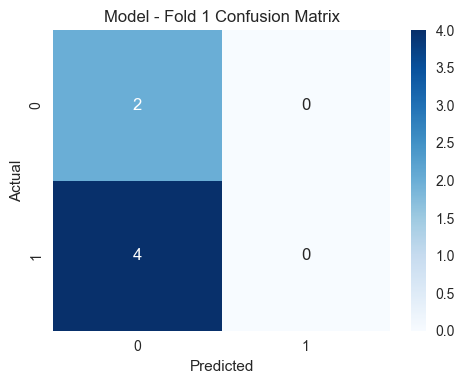

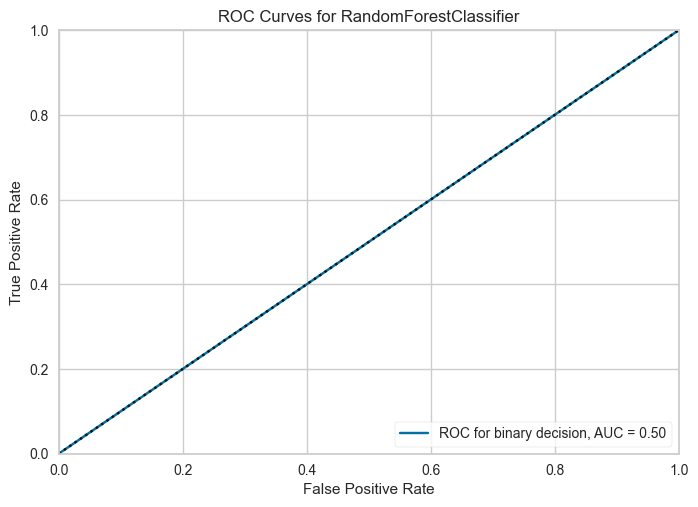


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



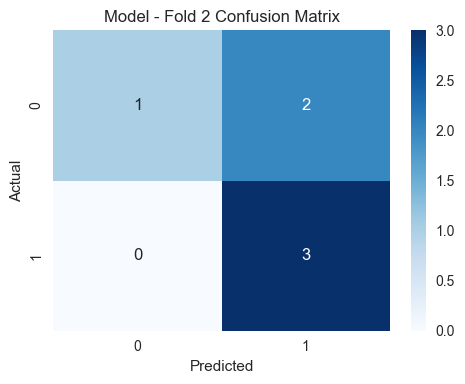

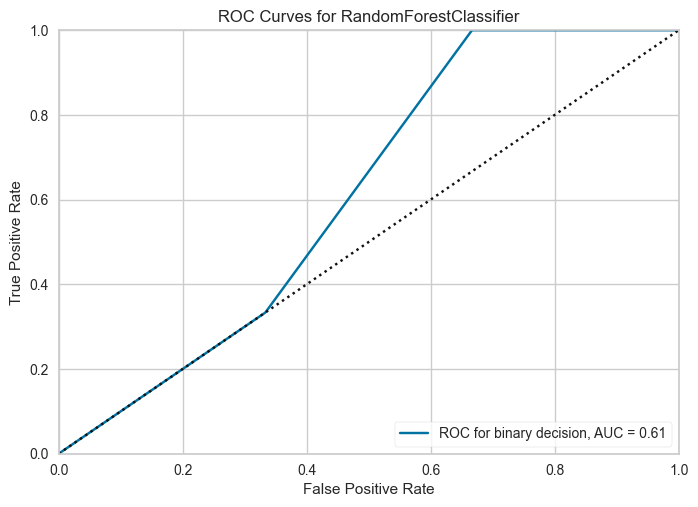


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.40      1.00      0.57         2

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6



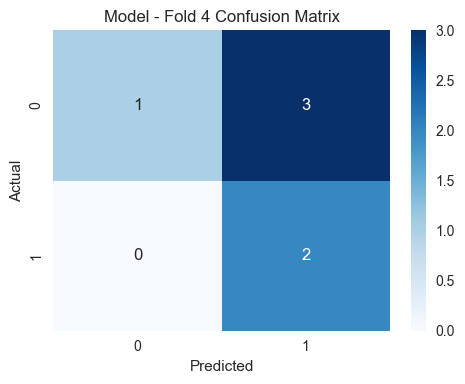

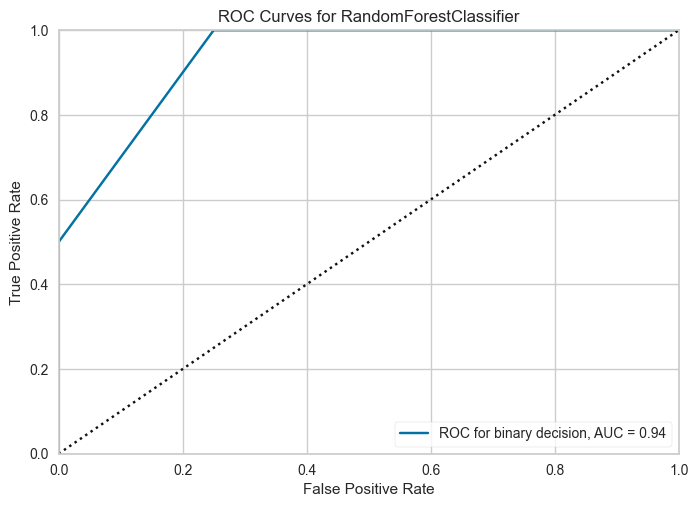


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:55:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



🔍 Evaluating XGBoost with historical data...

📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



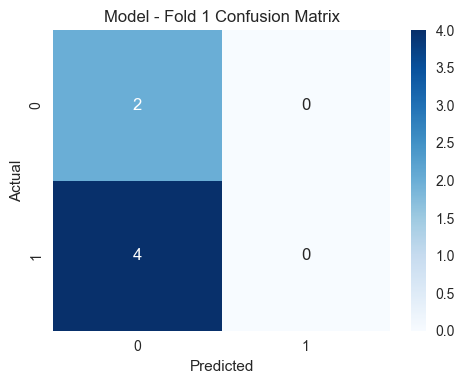

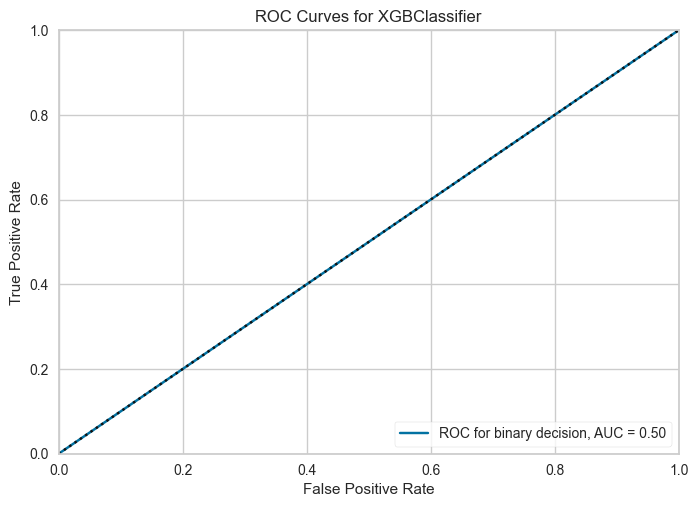


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.25      0.33      0.29         3

    accuracy                           0.17         6
   macro avg       0.12      0.17      0.14         6
weighted avg       0.12      0.17      0.14         6



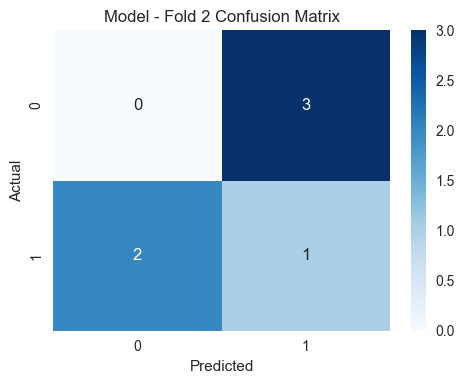

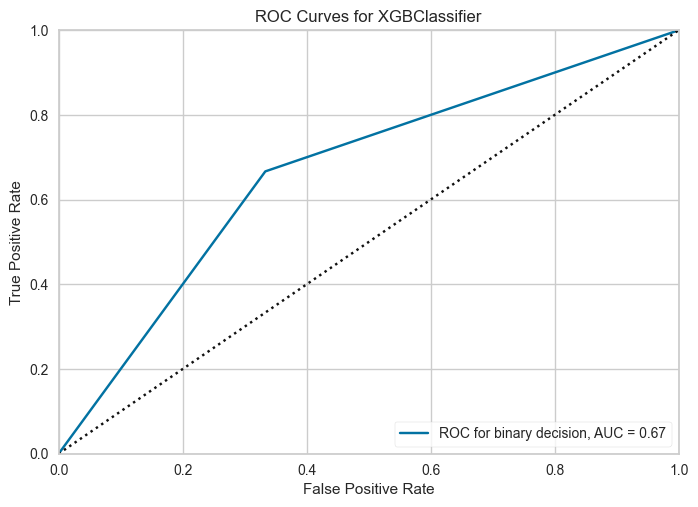


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



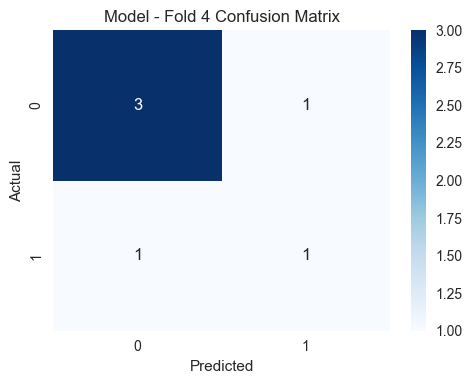

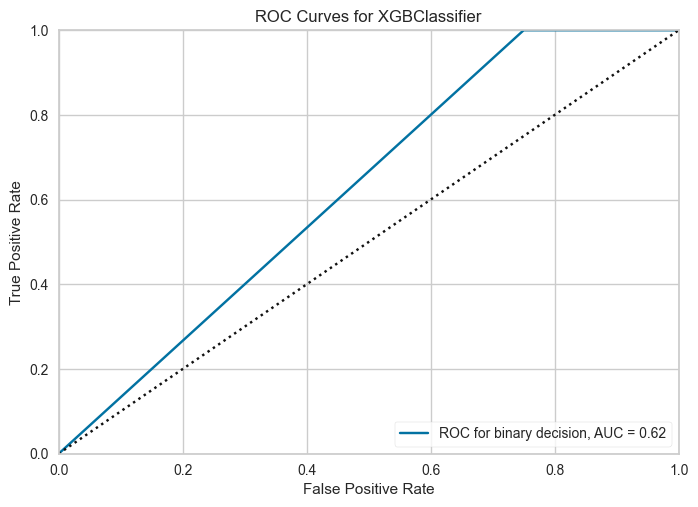


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:55:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



🔍 Evaluating LogReg with historical data...

📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



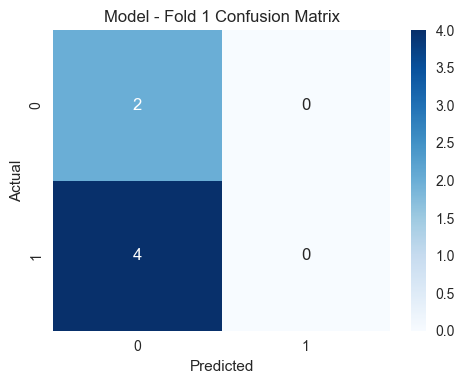

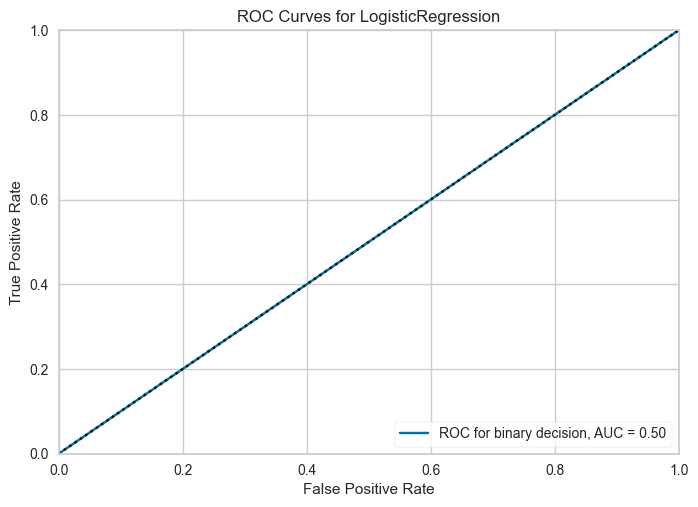


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



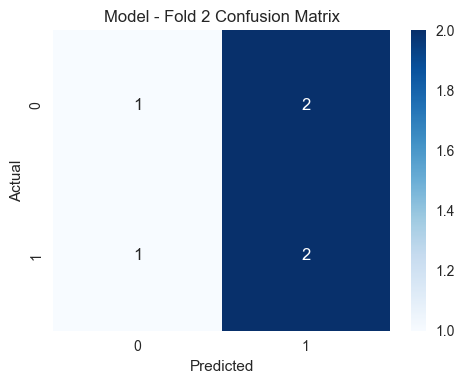

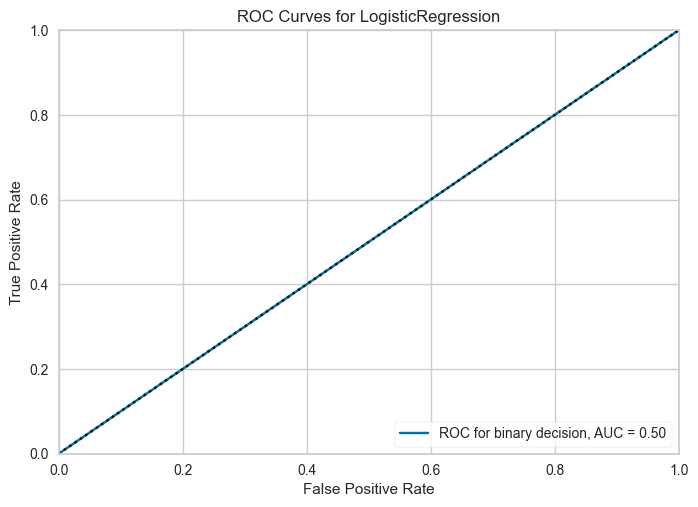


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



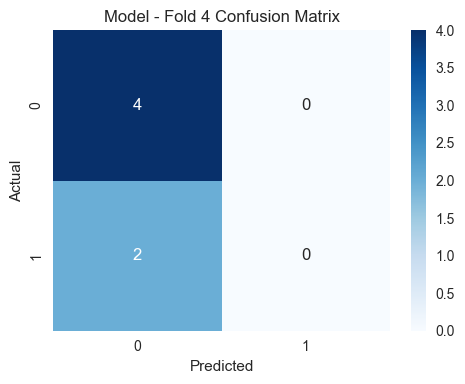

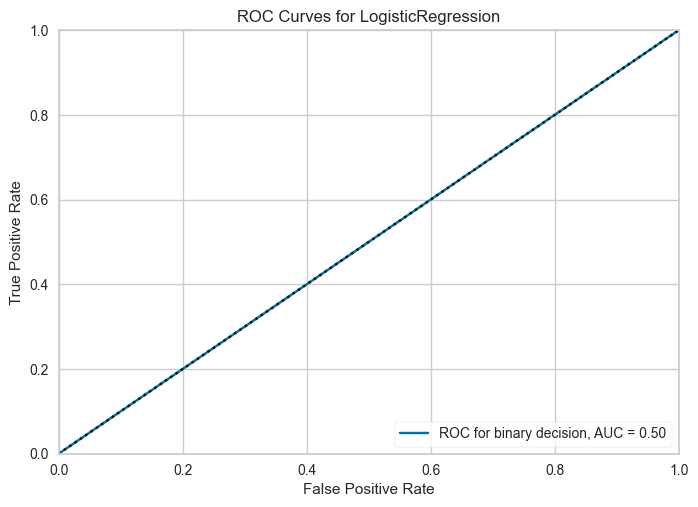


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:55:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



🔍 Evaluating SVM with historical data...

📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



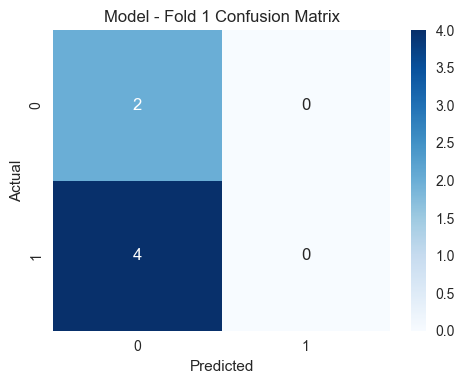

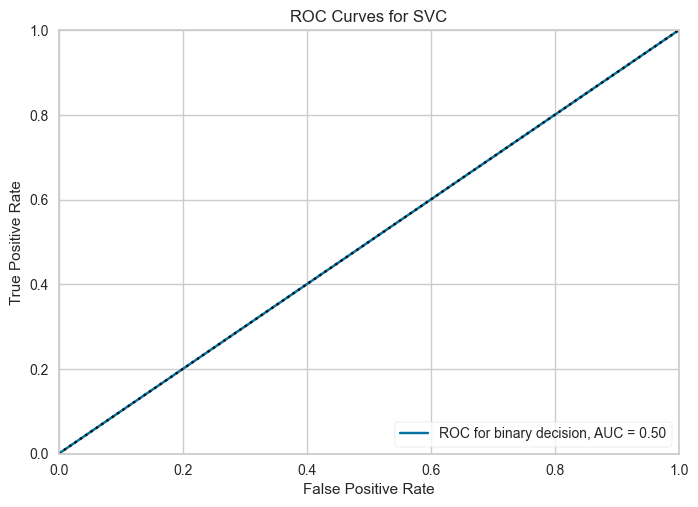


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



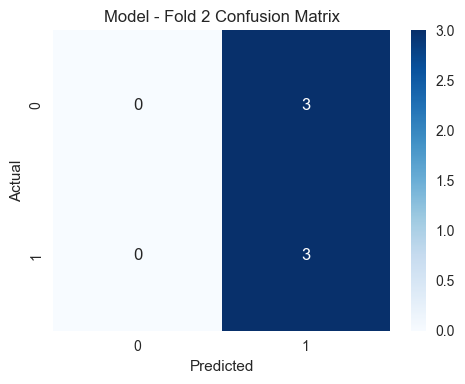

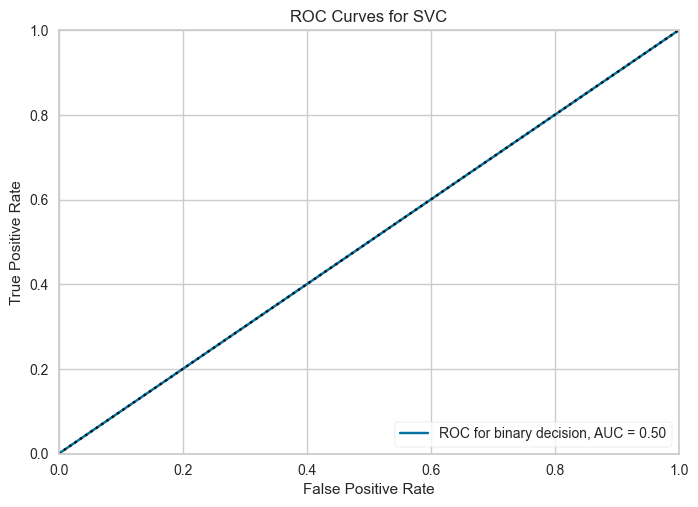


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



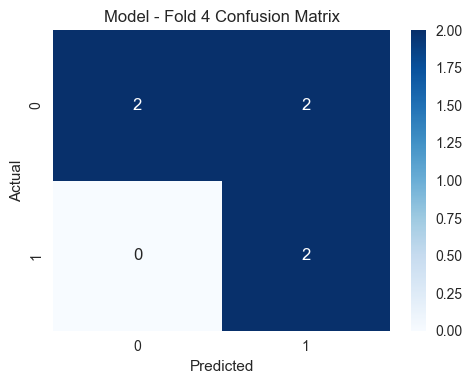

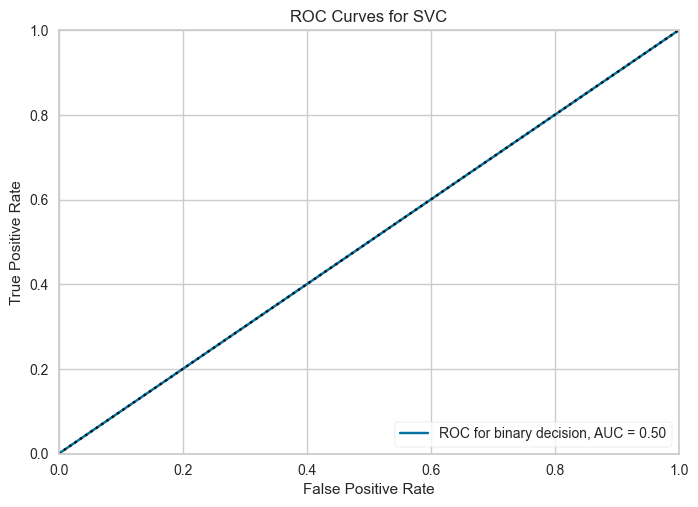


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:55:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



🔍 Evaluating MLP with historical data...

📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



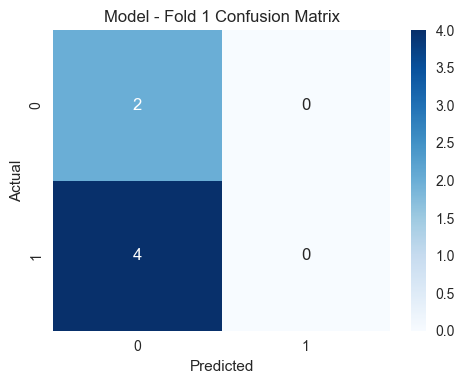

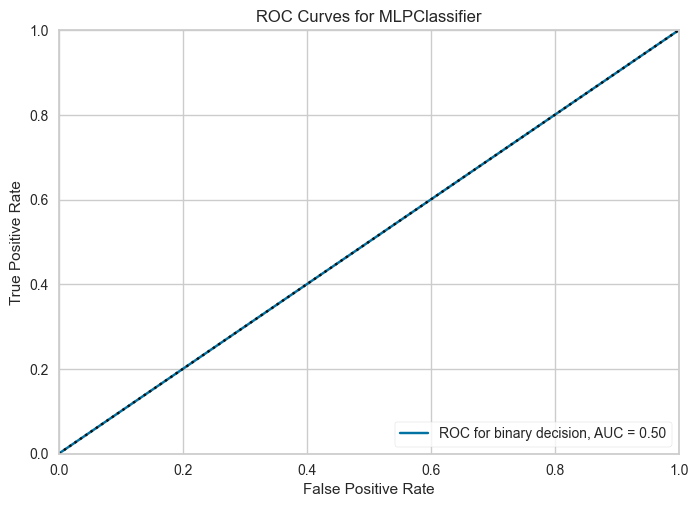


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



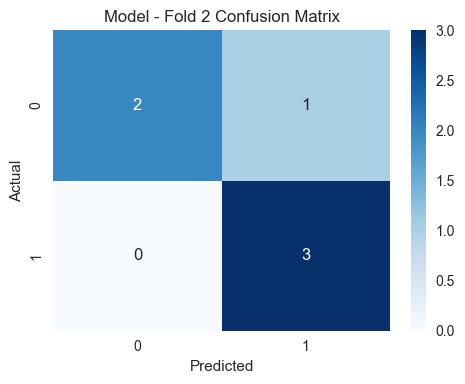

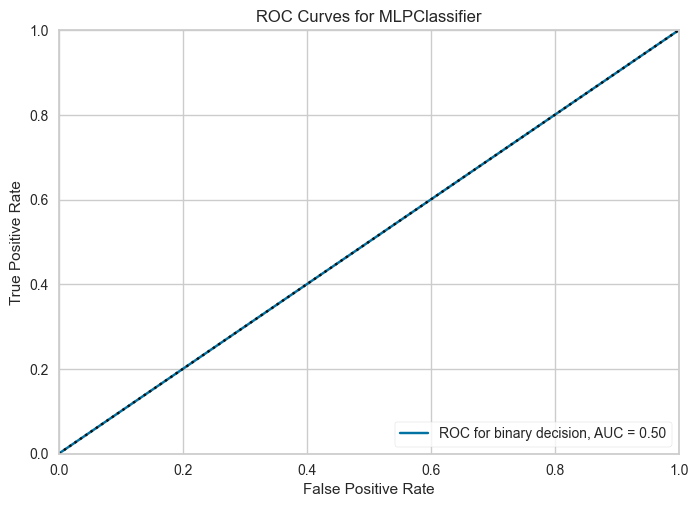


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.40      1.00      0.57         2

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6



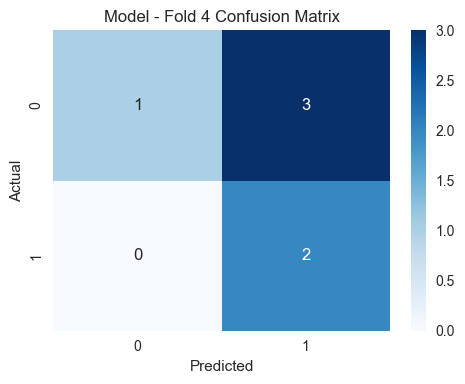

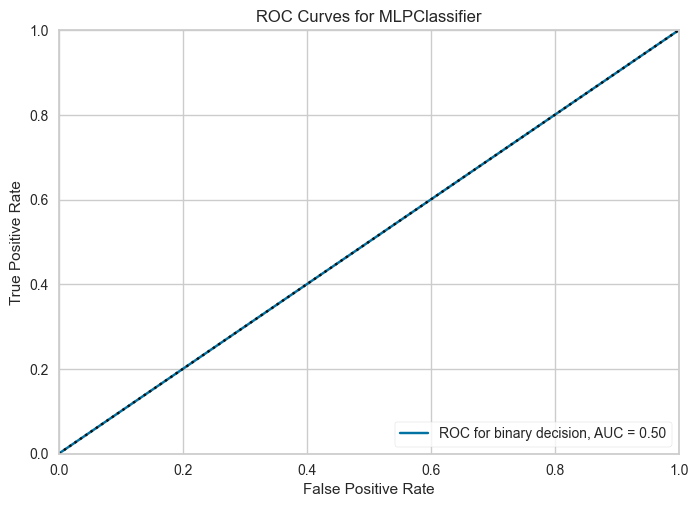


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:55:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [15]:
# Tahap 1 - Evaluasi data historis
features_hist = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.', 'Perubahan%']
X_hist = df_all[features_hist]

print("🔹 Tahap 1: Data Historis")
results_hist = {}

for name, model in models.items():
    print(f"\n🔍 Evaluating {name} with historical data...")
    results_hist[name] = evaluate_model(model, X_hist, y)

In [16]:
# Format output sebagai DataFrame
df_historis = pd.DataFrame(results_hist).T
print("\n📈 Rangkuman Evaluasi Model (Tahap Historis):")
df_historis


📈 Rangkuman Evaluasi Model (Tahap Historis):


accuracy_mean  precision_mean  recall_mean   f1_mean  \
RandomForest       0.500000        0.333333     0.666667  0.440476   
XGBoost            0.388889        0.250000     0.277778  0.261905   
LogReg             0.500000        0.166667     0.222222  0.190476   
SVM                0.500000        0.333333     0.666667  0.444444   
MLP                0.555556        0.383333     0.666667  0.476190   

              roc_auc_mean  directional_acc_mean  accuracy_std  precision_std  \
RandomForest      0.652778              0.500000      0.136083       0.249444   
XGBoost           0.310185              0.555556      0.207870       0.204124   
LogReg            0.717593              0.500000      0.136083       0.235702   
SVM               0.634259              0.500000      0.136083       0.235702   
MLP               0.555556              0.500000      0.207870       0.306413   

              recall_std    f1_std  roc_auc_std  directional_acc_std  
RandomForest    0.471405  0.319882     0.199343             0.136083  
XGBoost         0.207870  0.204817     0.187142             0.078567  
LogReg          0.314270  0.269374     0.066448             0.000000  
SVM             0.471405  0.314270     0.371353             0.136083  
MLP             0.471405  0.356348     0.218722             0.136083

🔹 Tahap 2: Data Gabungan

🔍 Evaluating RandomForest with combined data...

📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



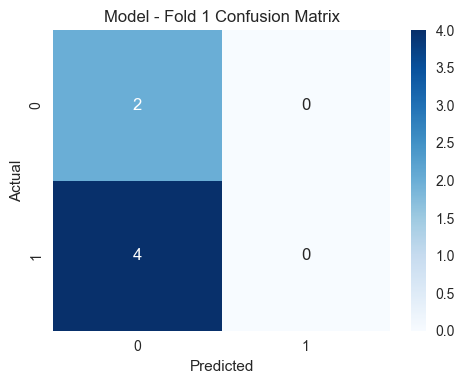

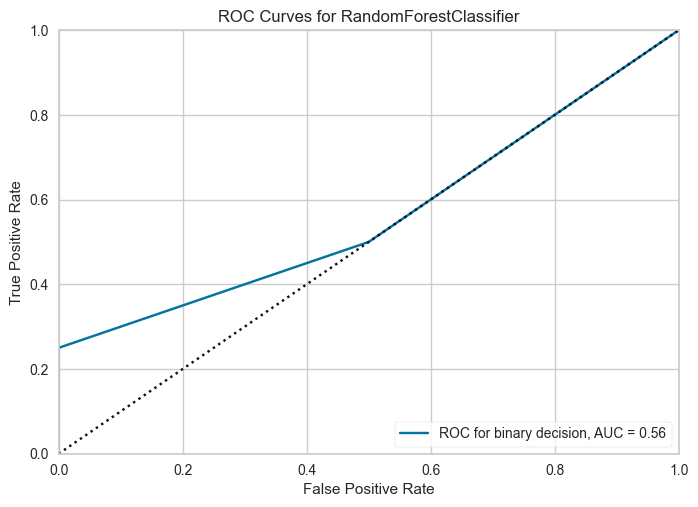


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



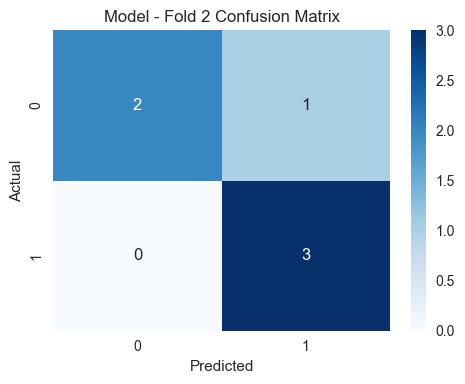

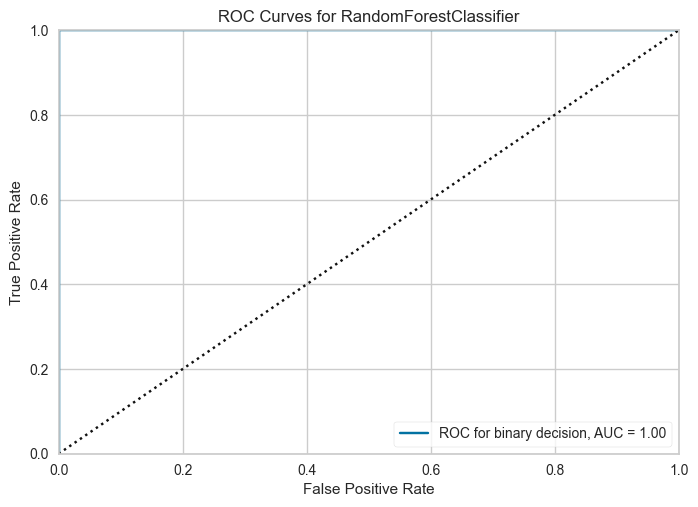


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



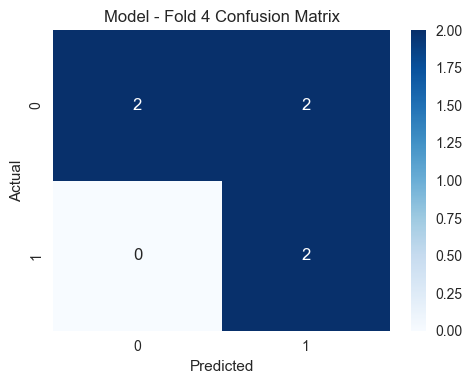

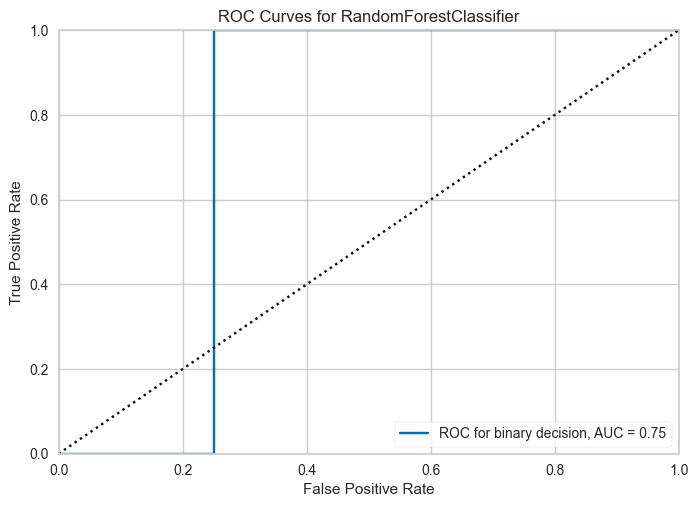


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:55:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



🔍 Evaluating XGBoost with combined data...

📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



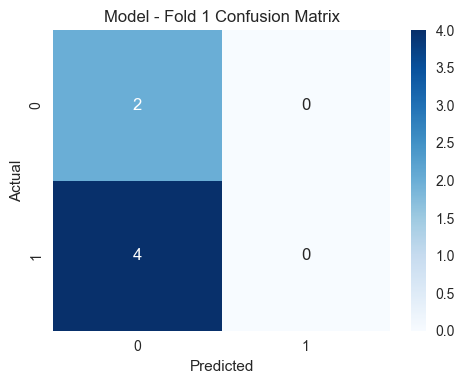

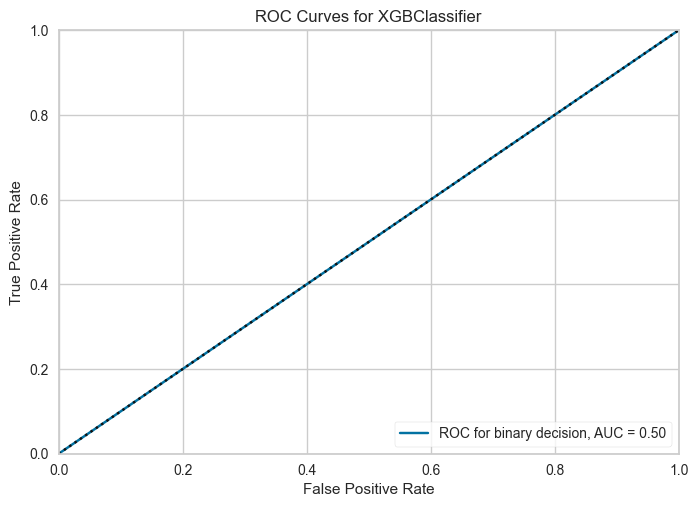


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



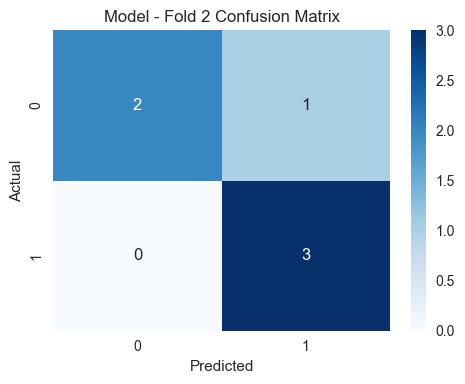

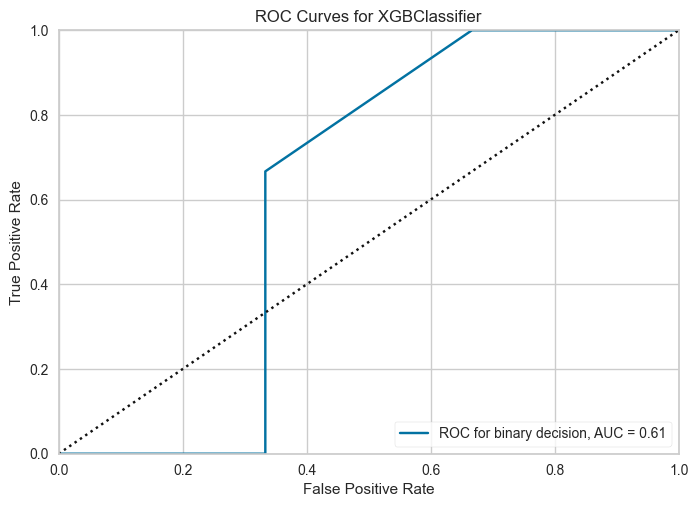


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



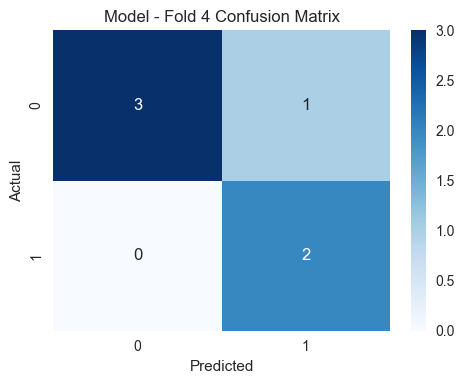

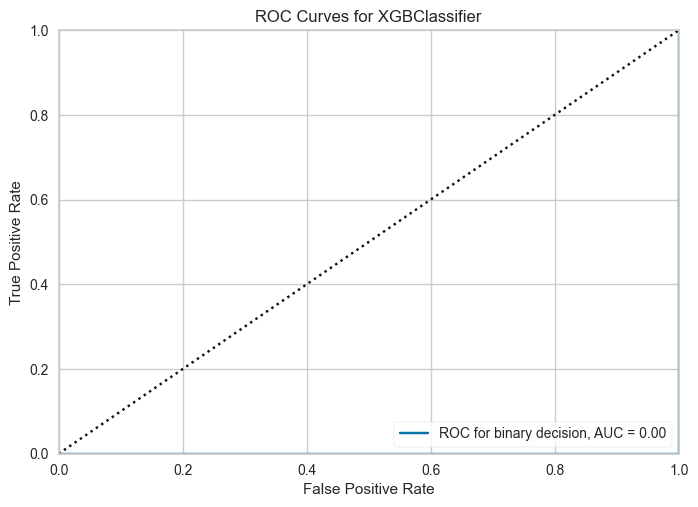


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:55:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



🔍 Evaluating LogReg with combined data...

📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



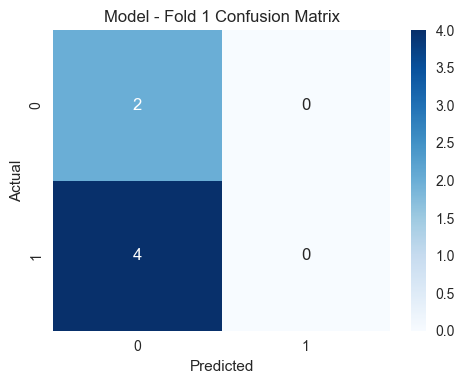

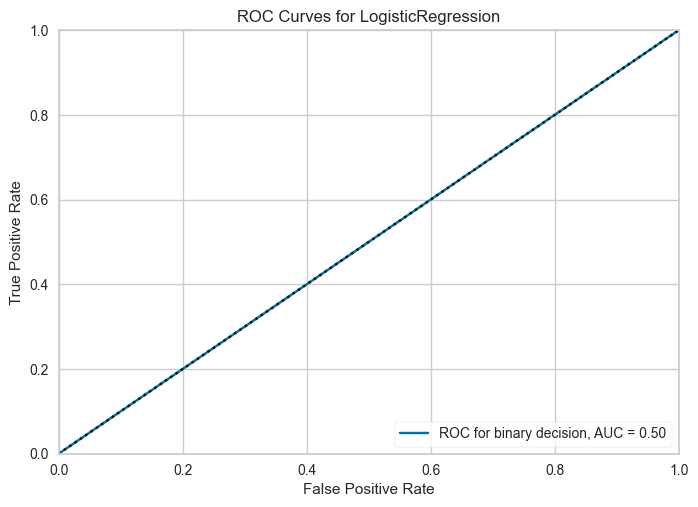


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



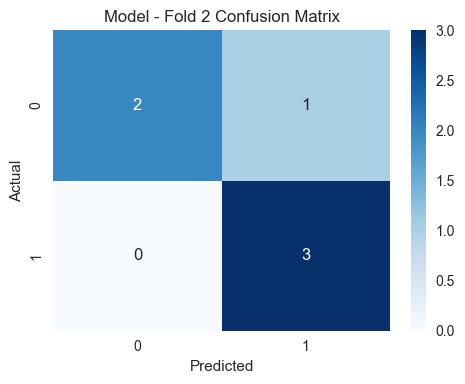

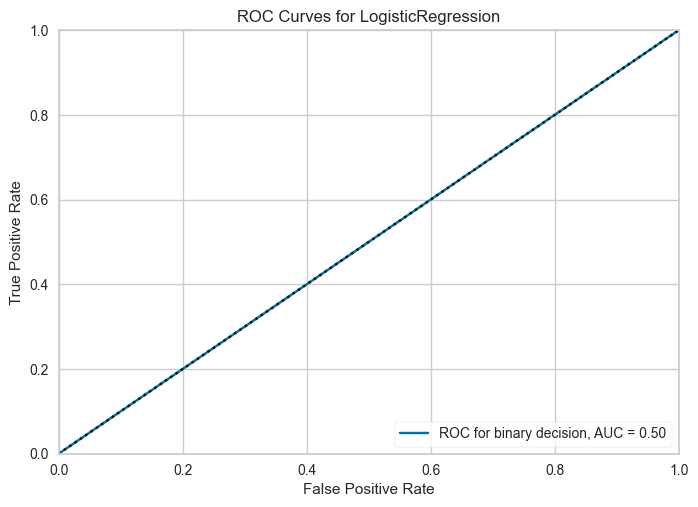


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



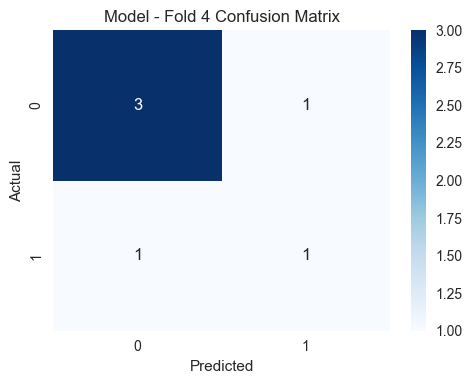

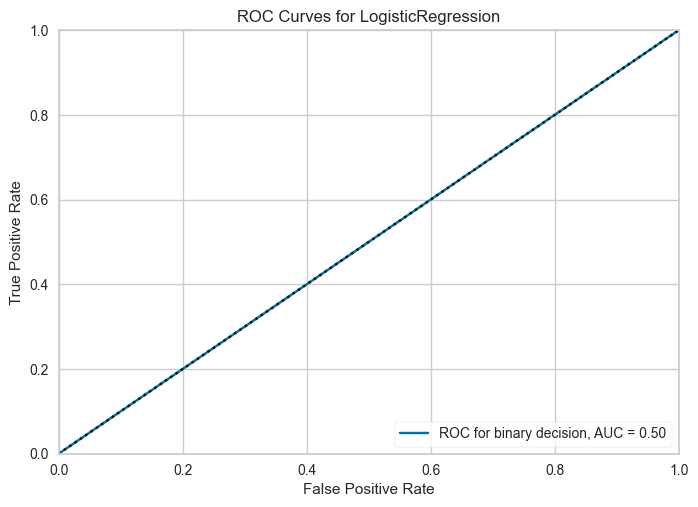


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:55:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



🔍 Evaluating SVM with combined data...

📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



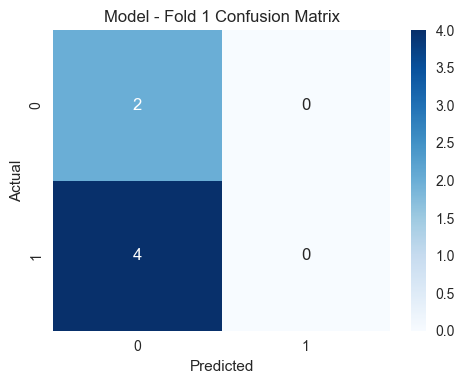

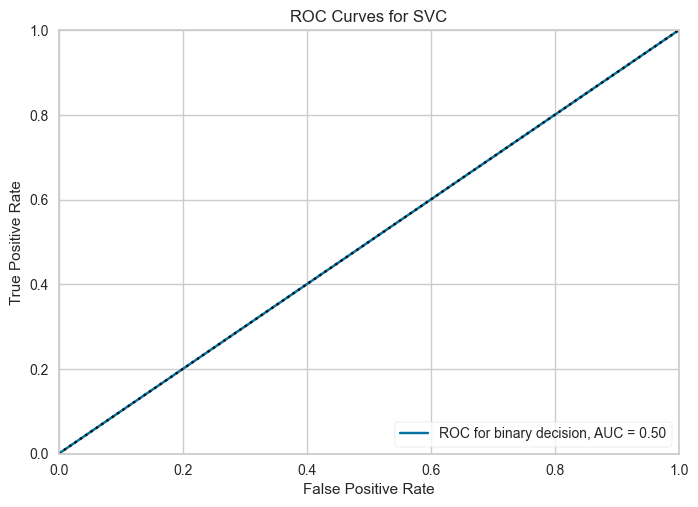


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



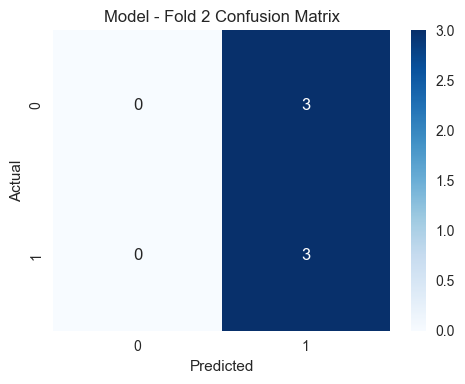

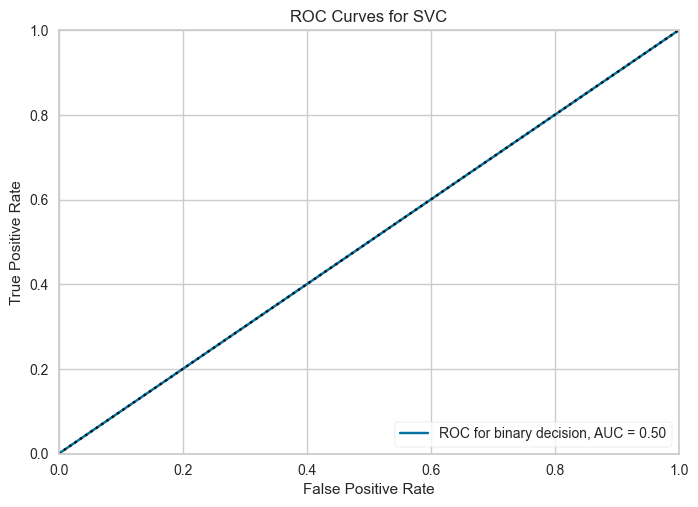


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.00      0.00      0.00         2

    accuracy                           0.50         6
   macro avg       0.30      0.38      0.33         6
weighted avg       0.40      0.50      0.44         6



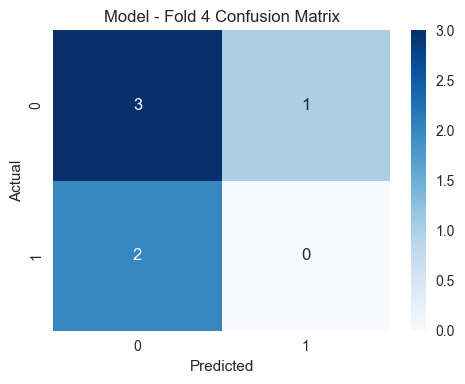

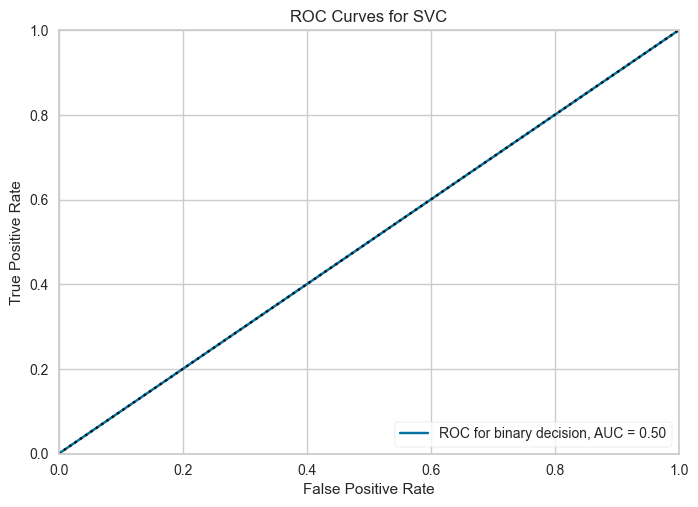


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:55:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



🔍 Evaluating MLP with combined data...

📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



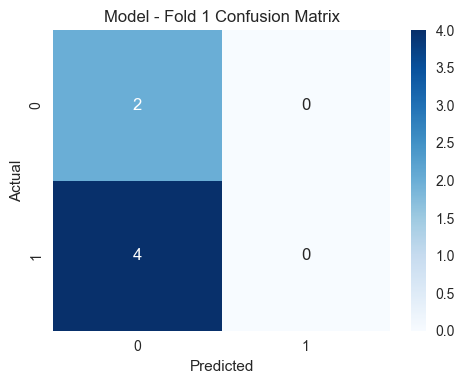

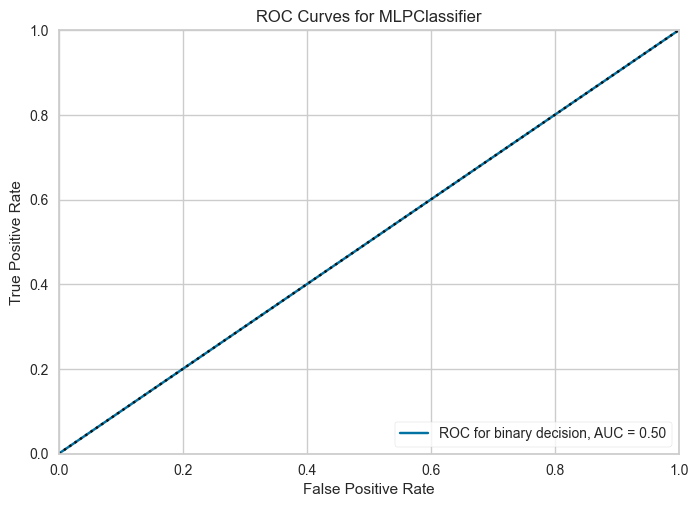


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



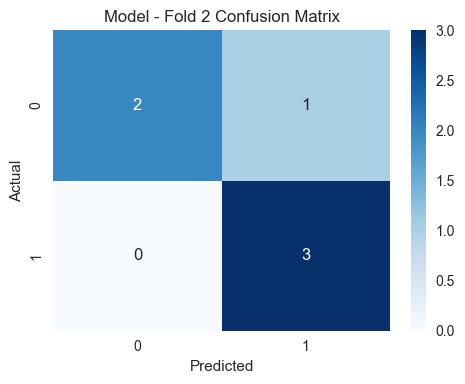

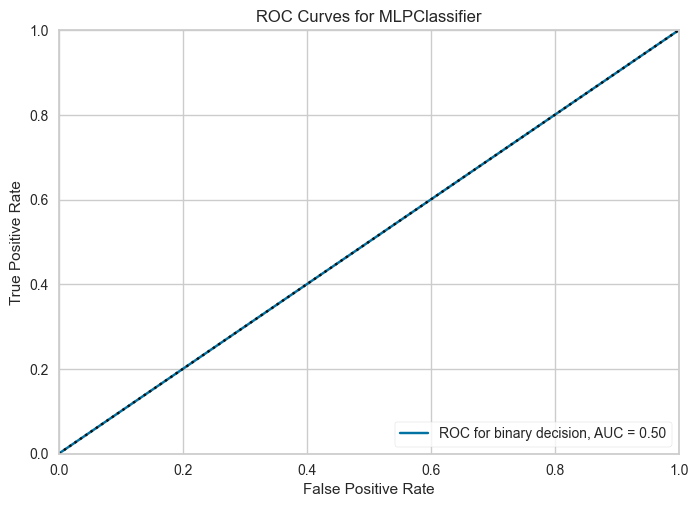


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.33      0.50      0.40         2

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



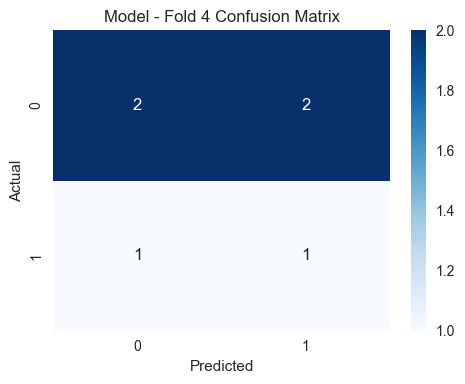

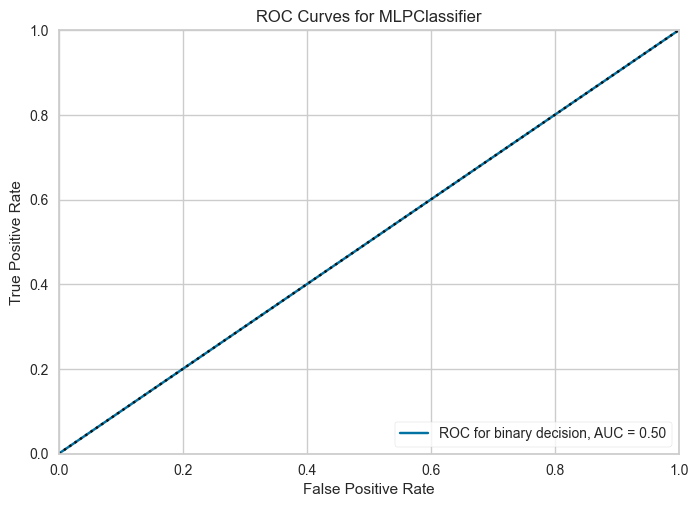


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:55:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [17]:
# Tahap 2 - Evaluasi data gabungan
features_combined = [
    'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.', 'Perubahan%',
    'avg_signed_sentiment', 'count_positive', 'count_negative', 'count_neutral', 'total_tweets',
    'range', 'day_return', 'sentiment_ratio', 'tweet_intensity',
    'lag_1', 'lag_2'
]
X_combined = df_all[features_combined]

print("🔹 Tahap 2: Data Gabungan")
results_combined = {}

for name, model in models.items():
    print(f"\n🔍 Evaluating {name} with combined data...")
    results_combined[name] = evaluate_model(model, X_combined, y)

In [18]:
df_combined = pd.DataFrame(results_combined).T
print("\n📈 Rangkuman Evaluasi Model (Tahap Gabungan):")
df_combined


📈 Rangkuman Evaluasi Model (Tahap Gabungan):


accuracy_mean  precision_mean  recall_mean   f1_mean  \
RandomForest       0.611111        0.416667     0.666667  0.507937   
XGBoost            0.666667        0.472222     0.666667  0.552381   
LogReg             0.611111        0.416667     0.500000  0.452381   
SVM                0.444444        0.166667     0.333333  0.222222   
MLP                0.555556        0.361111     0.500000  0.419048   

              roc_auc_mean  directional_acc_mean  accuracy_std  precision_std  \
RandomForest      0.833333              0.500000      0.207870       0.311805   
XGBoost           0.675926              0.611111      0.235702       0.335640   
LogReg            0.796296              0.555556      0.207870       0.311805   
SVM               0.583333              0.555556      0.078567       0.235702   
MLP               0.750000              0.500000      0.207870       0.306816   

              recall_std    f1_std  roc_auc_std  directional_acc_std  
RandomForest    0.471405  0.367487     0.117851             0.136083  
XGBoost         0.471405  0.391288     0.124914             0.078567  
LogReg          0.408248  0.351543     0.214367             0.078567  
SVM             0.471405  0.314270     0.424918             0.078567  
MLP             0.408248  0.350186     0.270031             0.136083

In [19]:
def optimize_model(model, param_grid, X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=tscv, scoring='f1', n_jobs=-1)
    grid.fit(X, y)
    return grid.best_estimator_, grid.best_params_

In [20]:
print("\n🔹 Tahap 3: Optimasi Model")

optimized_models = {}
optimized_folds = [3, 5, 10]


🔹 Tahap 3: Optimasi Model


In [21]:
# Random Forest

rf_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
}

optimized_models['RandomForest'] = {}  # Buat dict nested untuk tiap fold

for n_fold in optimized_folds:
    print(f"\n🔹 Optimasi Random Forest dengan {n_fold}-fold TimeSeriesSplit")
    best_rf, best_rf_params = optimize_model(
        RandomForestClassifier(random_state=42),
        rf_grid,
        X_combined, y,
        n_splits=n_fold  # pastikan fungsi optimize_model menerima ini
    )
    print(f"✅ Best Params ({n_fold} fold):", best_rf_params)

    # Simpan berdasarkan jumlah fold
    optimized_models['RandomForest'][f'{n_fold}_fold'] = {
        'model': best_rf,
        'params': best_rf_params
    }


🔹 Optimasi Random Forest dengan 3-fold TimeSeriesSplit
✅ Best Params (3 fold): {'model__max_depth': None, 'model__n_estimators': 200}

🔹 Optimasi Random Forest dengan 5-fold TimeSeriesSplit
✅ Best Params (5 fold): {'model__max_depth': None, 'model__n_estimators': 100}

🔹 Optimasi Random Forest dengan 10-fold TimeSeriesSplit
✅ Best Params (10 fold): {'model__max_depth': None, 'model__n_estimators': 200}


In [22]:
# XGBoost

xgb_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6],
    'model__learning_rate': [0.05, 0.1]
}

optimized_models['XGBoost'] = {}  # Buat dict nested untuk tiap fold

for n_fold in optimized_folds:
    print(f"\n🔹 Optimasi XGBoost dengan {n_fold}-fold TimeSeriesSplit")
    best_xgb, best_xgb_params = optimize_model(
        XGBClassifier(eval_metric='logloss'),
        xgb_grid,
        X_combined, y,
        n_splits=n_fold  # pastikan fungsi optimize_model menerima ini
    )
    print(f"✅ Best Params ({n_fold} fold):", best_xgb_params)

    # Simpan berdasarkan jumlah fold
    optimized_models['XGBoost'][f'{n_fold}_fold'] = {
        'model': best_xgb,
        'params': best_xgb_params
    }


🔹 Optimasi XGBoost dengan 3-fold TimeSeriesSplit
✅ Best Params (3 fold): {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}

🔹 Optimasi XGBoost dengan 5-fold TimeSeriesSplit
✅ Best Params (5 fold): {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}

🔹 Optimasi XGBoost dengan 10-fold TimeSeriesSplit
✅ Best Params (10 fold): {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}


In [23]:
# LogReg

logreg_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs']
}

optimized_models['LogReg'] = {}  # Buat dict nested untuk tiap fold

for n_fold in optimized_folds:
    print(f"\n🔹 Optimasi LogReg dengan {n_fold}-fold TimeSeriesSplit")
    best_logreg, best_logreg_params = optimize_model(
        LogisticRegression(max_iter=1000),
        logreg_grid,
        X_combined, y,
        n_splits=n_fold  # pastikan fungsi optimize_model menerima ini
    )
    print(f"✅ Best Params ({n_fold} fold):", best_logreg_params)

    # Simpan berdasarkan jumlah fold
    optimized_models['LogReg'][f'{n_fold}_fold'] = {
        'model': best_logreg,
        'params': best_logreg_params
    }


🔹 Optimasi LogReg dengan 3-fold TimeSeriesSplit
✅ Best Params (3 fold): {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

🔹 Optimasi LogReg dengan 5-fold TimeSeriesSplit
✅ Best Params (5 fold): {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

🔹 Optimasi LogReg dengan 10-fold TimeSeriesSplit
✅ Best Params (10 fold): {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


In [24]:
# SVC

svc_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}

optimized_models['SVC'] = {}  # Buat dict nested untuk tiap fold

for n_fold in optimized_folds:
    print(f"\n🔹 Optimasi SVC dengan {n_fold}-fold TimeSeriesSplit")
    best_svc, best_svc_params = optimize_model(
        SVC(),
        svc_grid,
        X_combined, y,
        n_splits=n_fold  # pastikan fungsi optimize_model menerima ini
    )
    print(f"✅ Best Params ({n_fold} fold):", best_svc_params)

    # Simpan berdasarkan jumlah fold
    optimized_models['SVC'][f'{n_fold}_fold'] = {
        'model': best_svc,
        'params': best_svc_params
    }


🔹 Optimasi SVC dengan 3-fold TimeSeriesSplit
✅ Best Params (3 fold): {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

🔹 Optimasi SVC dengan 5-fold TimeSeriesSplit
✅ Best Params (5 fold): {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

🔹 Optimasi SVC dengan 10-fold TimeSeriesSplit
✅ Best Params (10 fold): {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}


In [25]:
# MLP

mlp_grid = {
    'model__hidden_layer_sizes': [(100,), (50, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__alpha': [0.0001, 0.001]
}

optimized_models['MLP'] = {}  # Buat dict nested untuk tiap fold

for n_fold in optimized_folds:
    print(f"\n🔹 Optimasi mlp dengan {n_fold}-fold TimeSeriesSplit")
    best_mlp, best_mlp_params = optimize_model(
        MLPClassifier(max_iter=1000, random_state=42),
        mlp_grid,
        X_combined, y,
        n_splits=n_fold  # pastikan fungsi optimize_model menerima ini
    )
    print(f"✅ Best Params ({n_fold} fold):", best_mlp_params)

    # Simpan berdasarkan jumlah fold
    optimized_models['MLP'][f'{n_fold}_fold'] = {
        'model': best_mlp,
        'params': best_mlp_params
    }


🔹 Optimasi mlp dengan 3-fold TimeSeriesSplit
✅ Best Params (3 fold): {'model__activation': 'tanh', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (100,)}

🔹 Optimasi mlp dengan 5-fold TimeSeriesSplit
✅ Best Params (5 fold): {'model__activation': 'relu', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (50, 50)}

🔹 Optimasi mlp dengan 10-fold TimeSeriesSplit
✅ Best Params (10 fold): {'model__activation': 'relu', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (50, 50)}



📈 Evaluasi Ulang Setelah Optimasi

📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



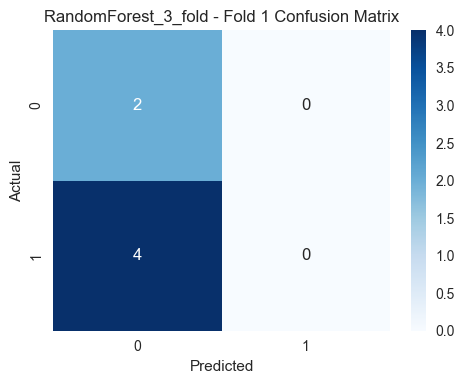

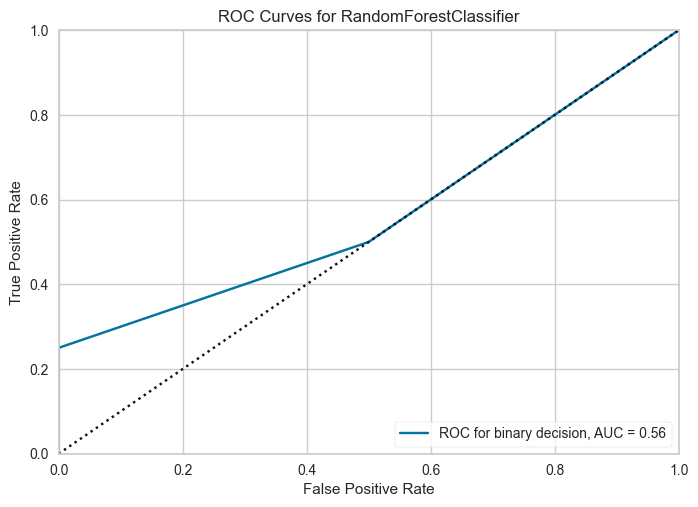


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



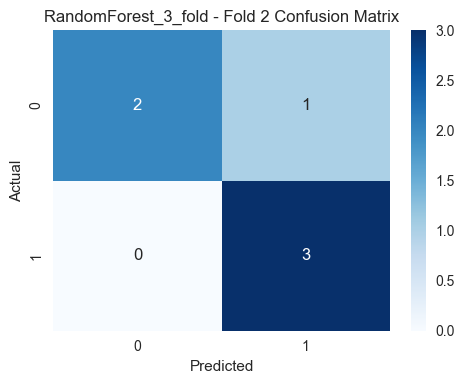

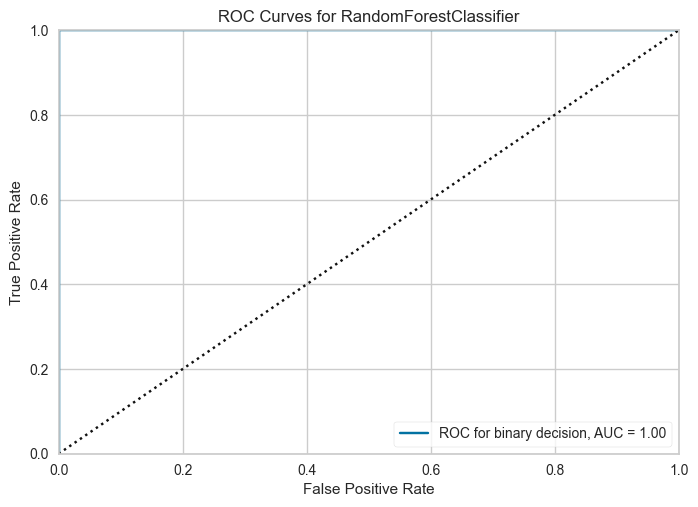


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



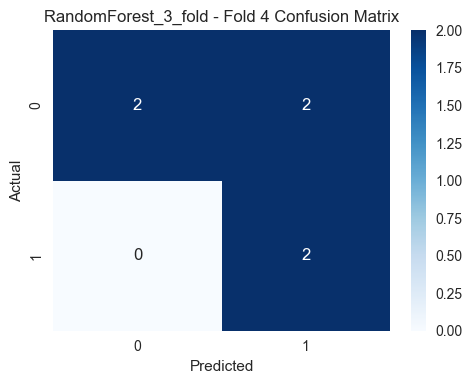

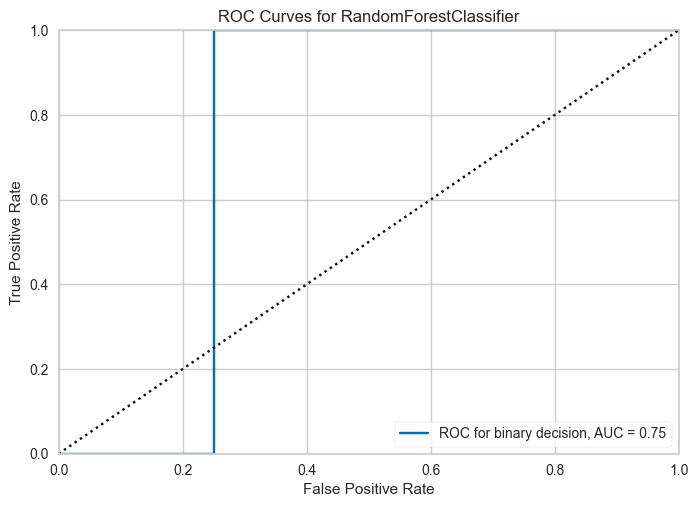


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:56:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



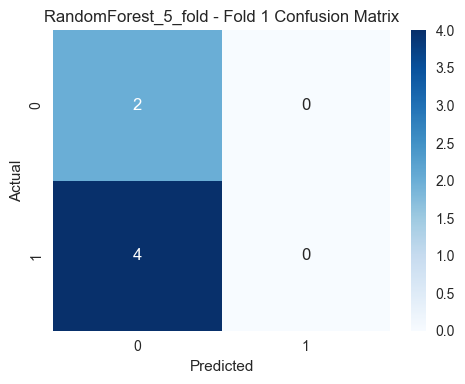

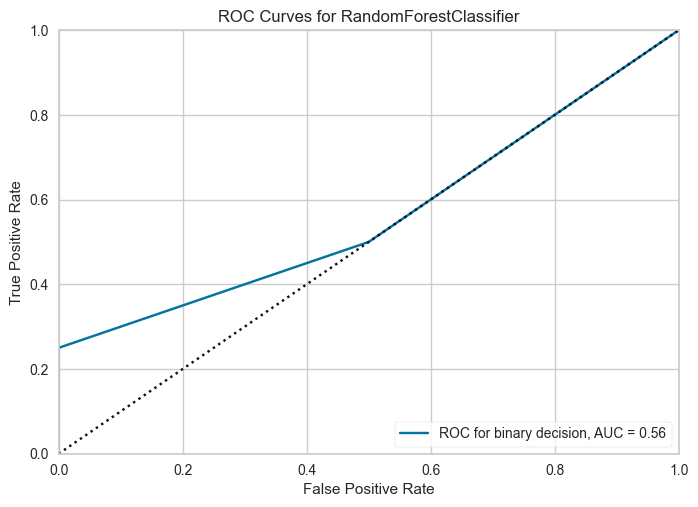


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



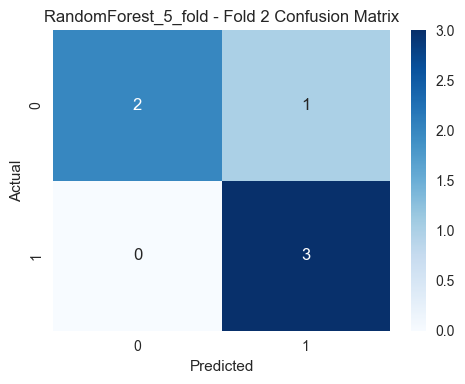

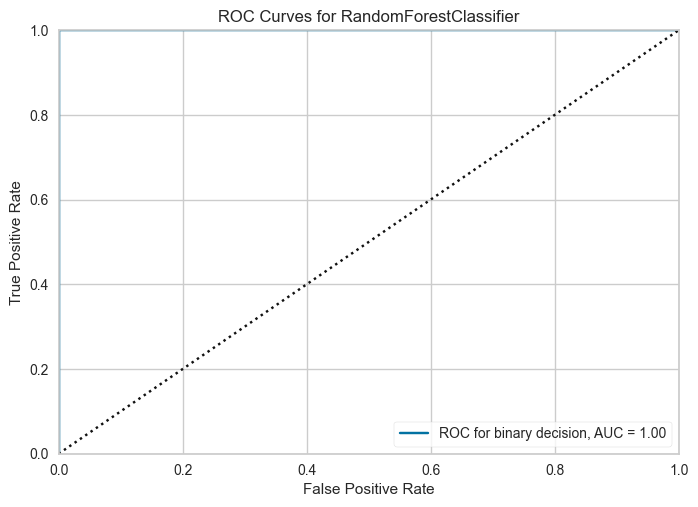


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



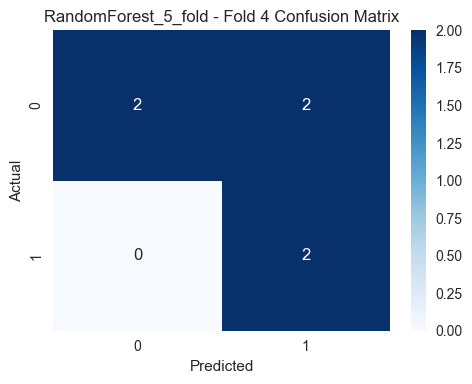

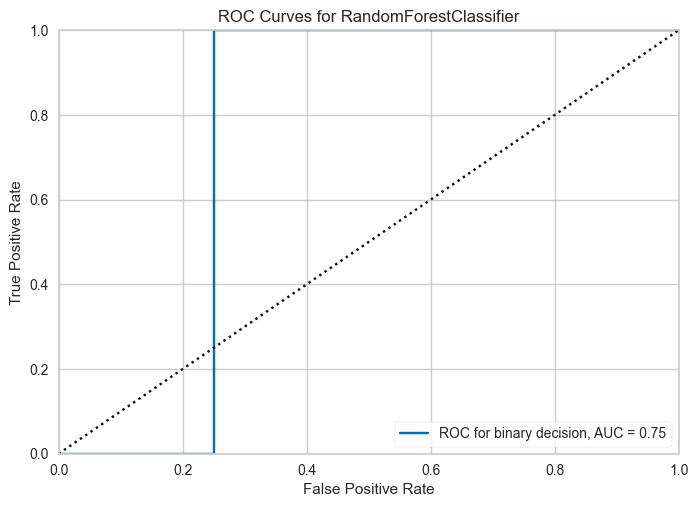


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:56:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



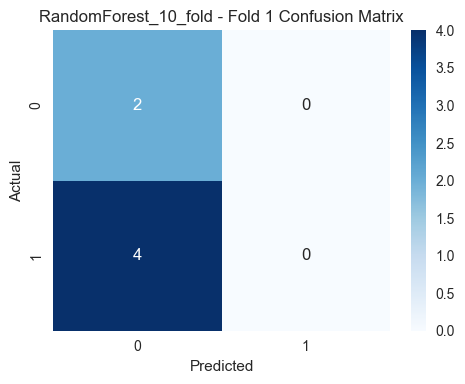

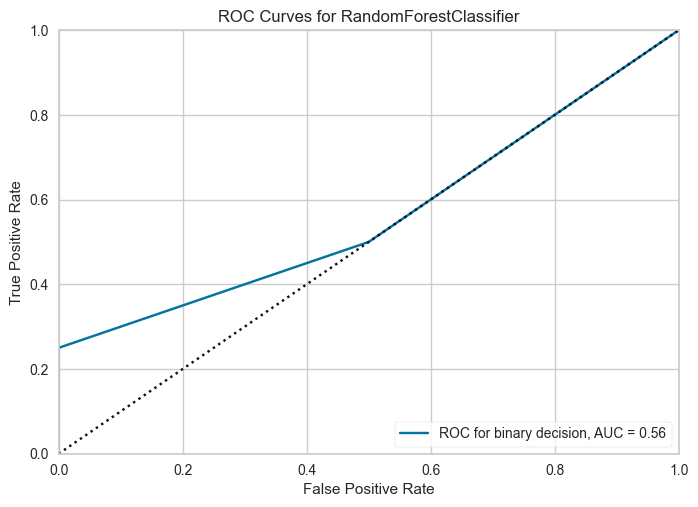


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



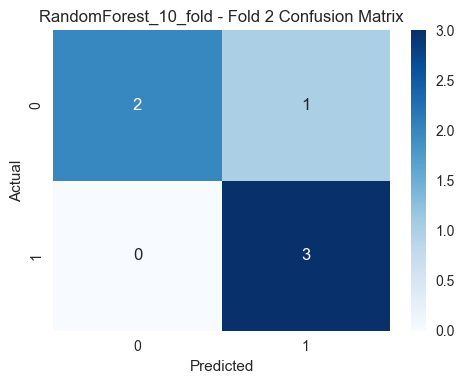

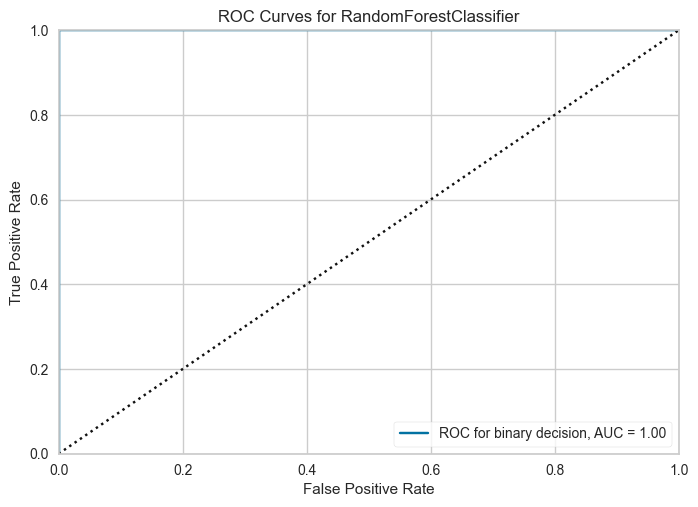


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



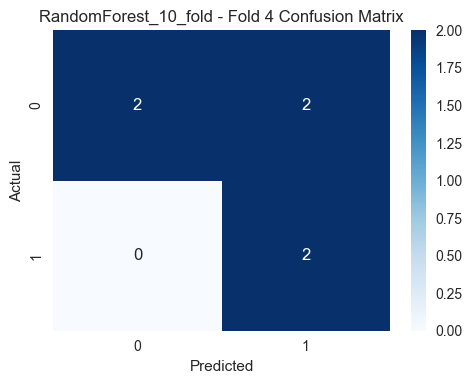

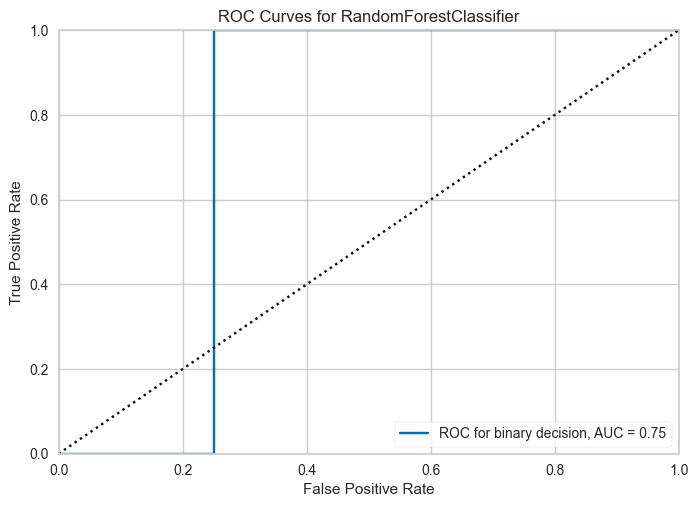


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:56:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



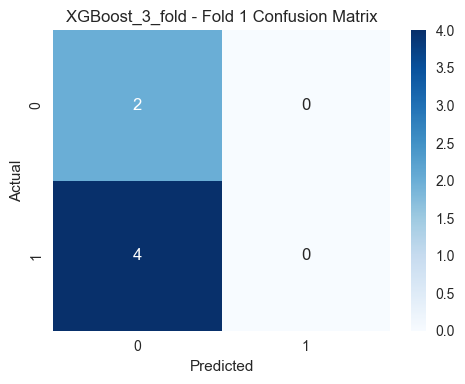

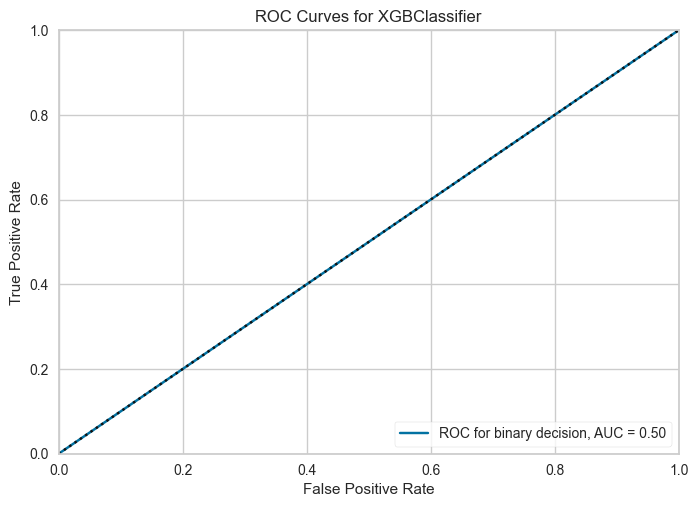


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



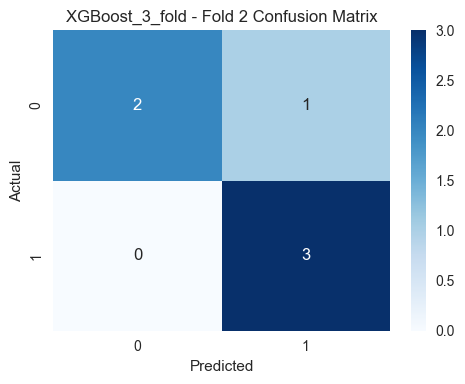

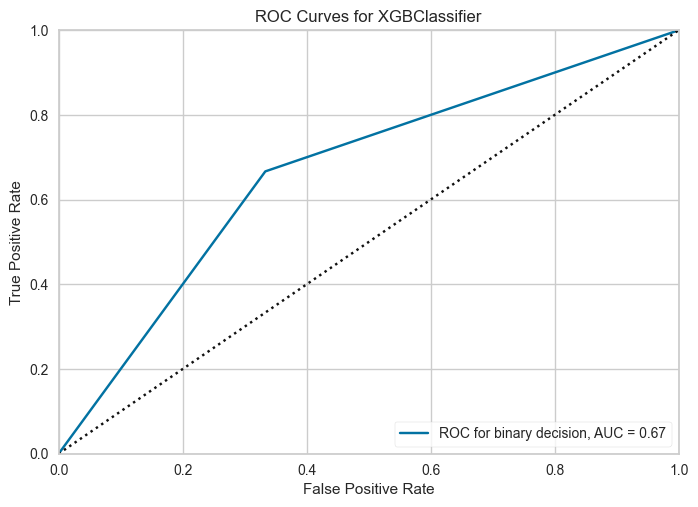


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.40      1.00      0.57         2

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6



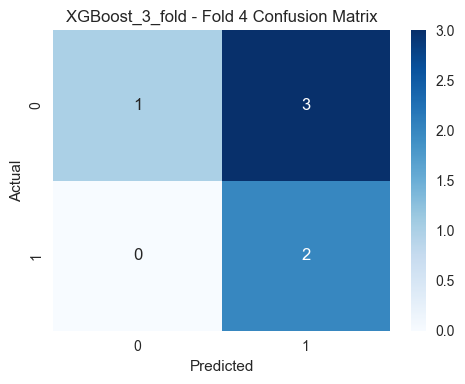

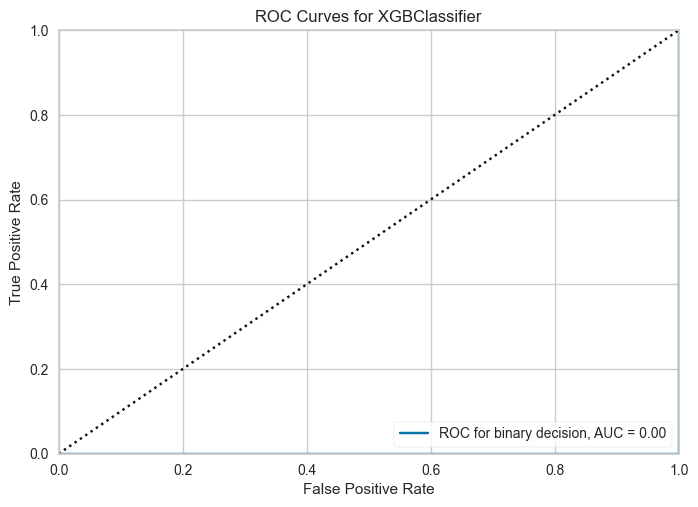


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:56:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



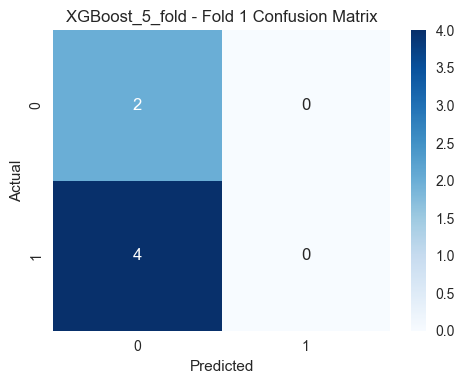

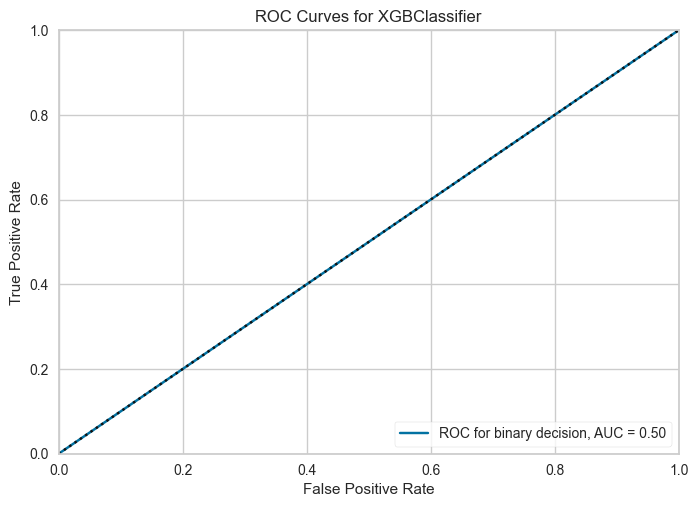


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



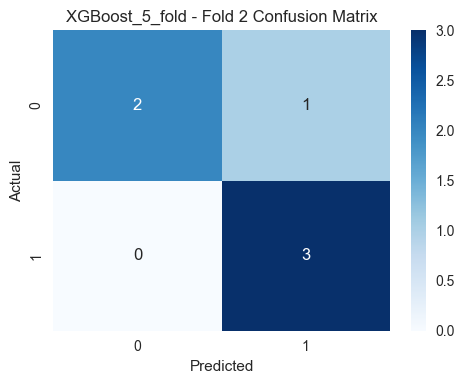

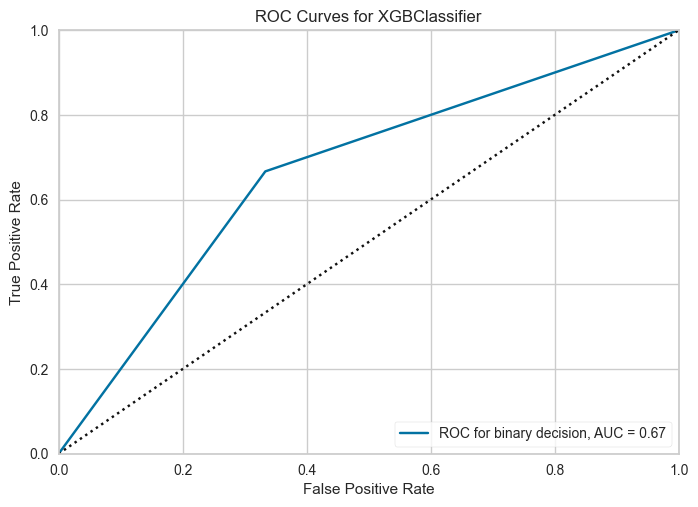


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



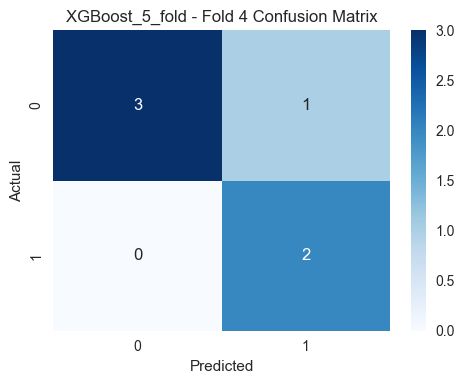

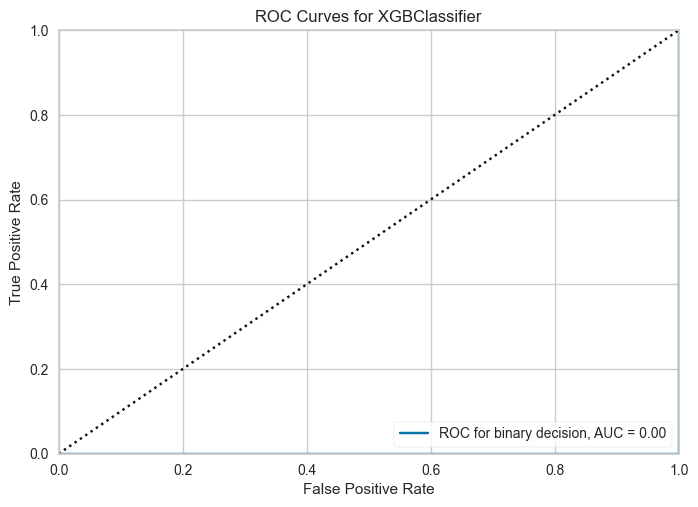


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:56:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



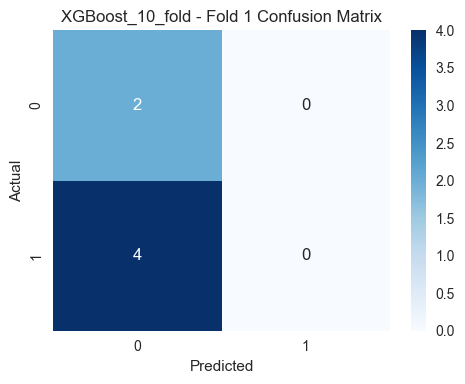

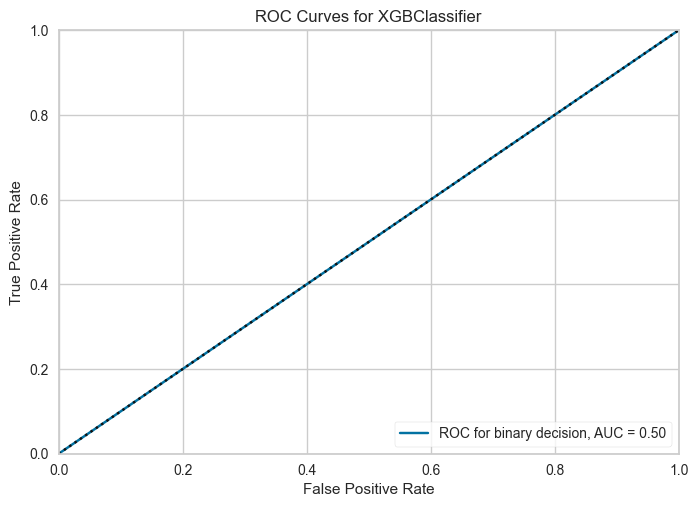


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



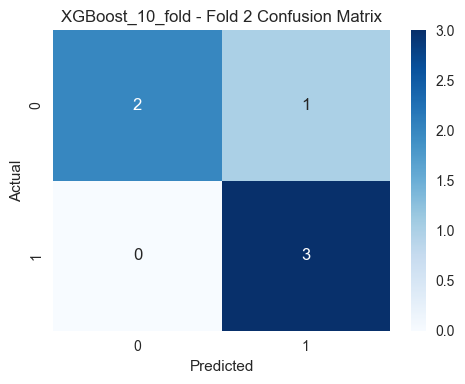

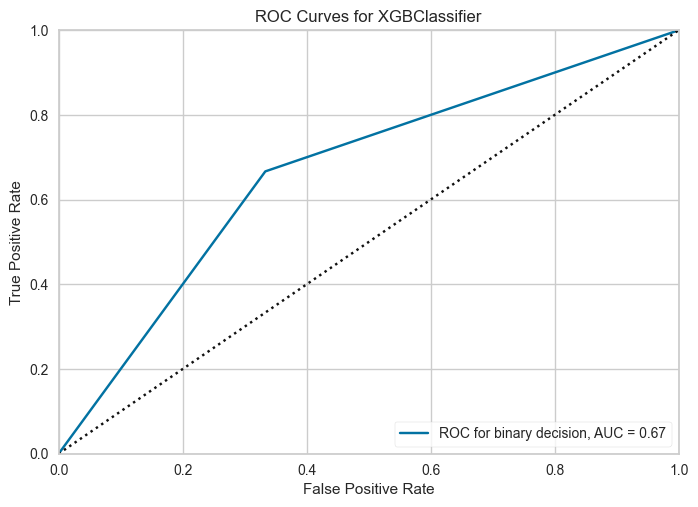


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.40      1.00      0.57         2

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6



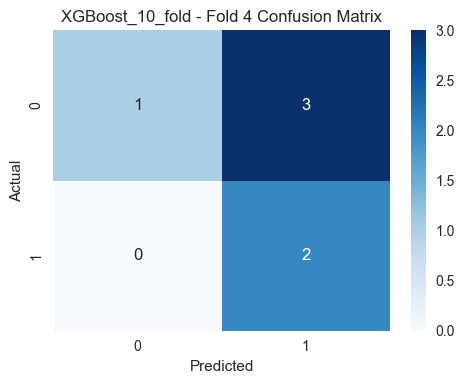

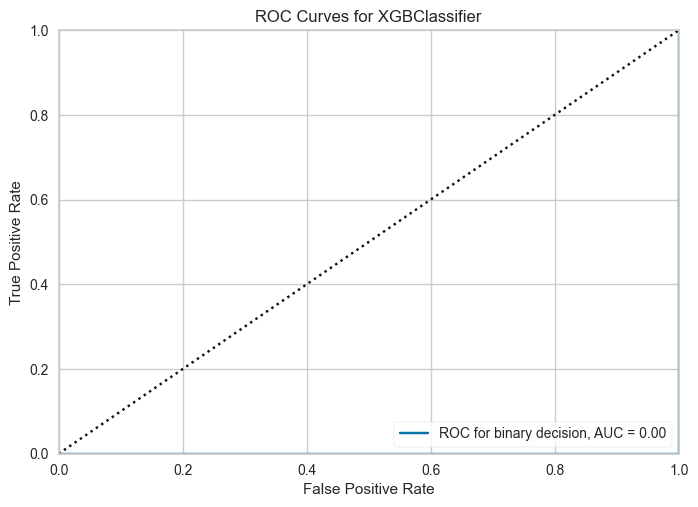


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:56:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



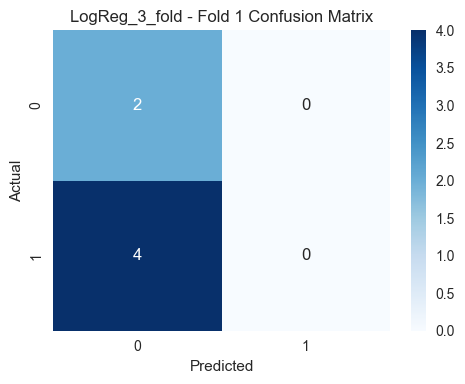

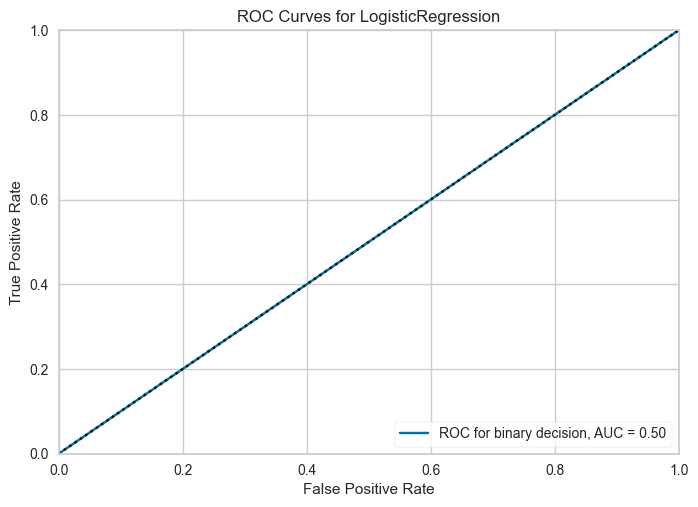


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



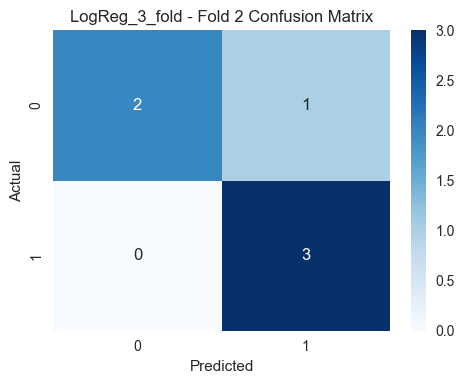

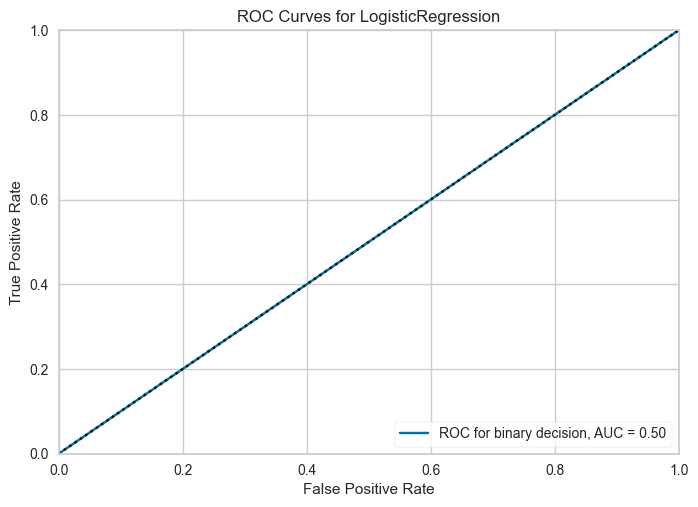


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.00      0.00      0.00         2

    accuracy                           0.50         6
   macro avg       0.30      0.38      0.33         6
weighted avg       0.40      0.50      0.44         6



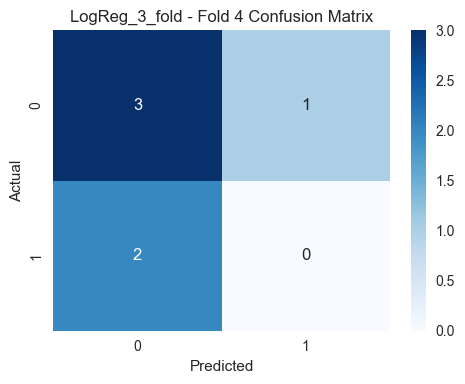

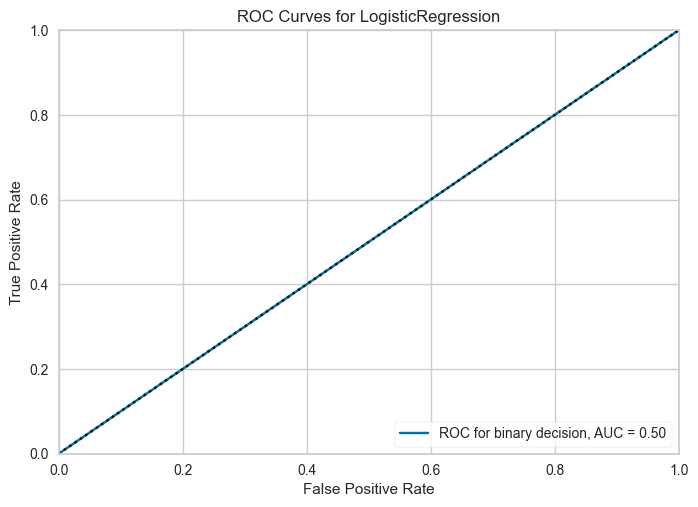


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:56:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



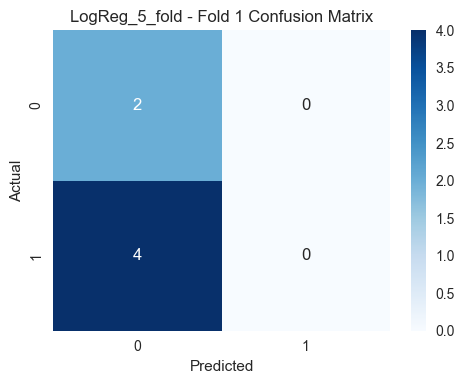

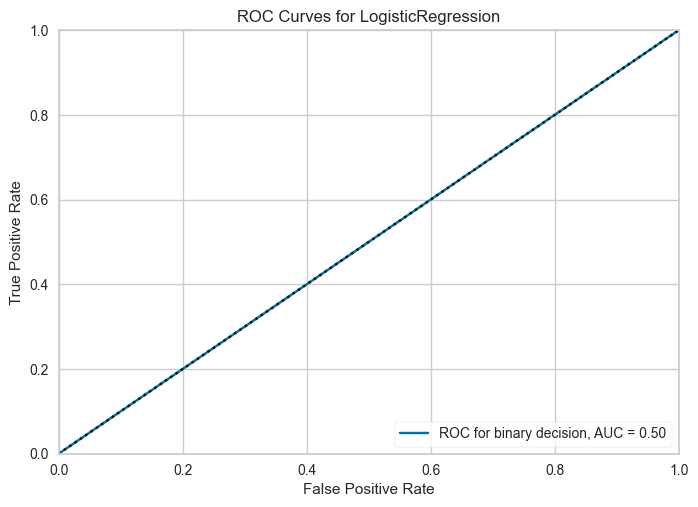


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



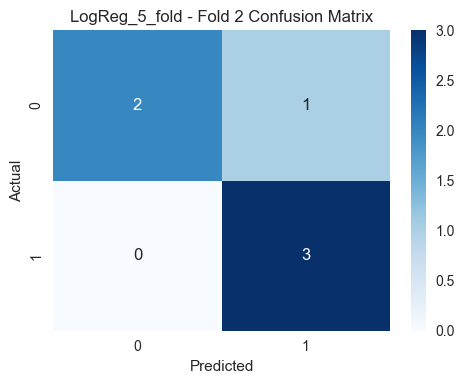

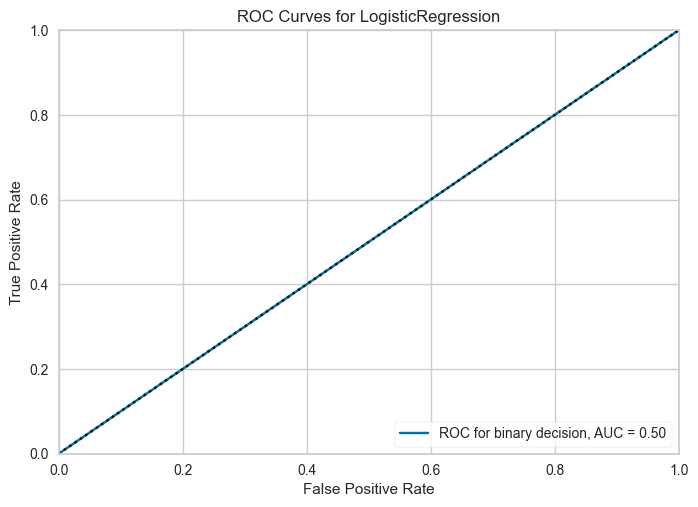


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



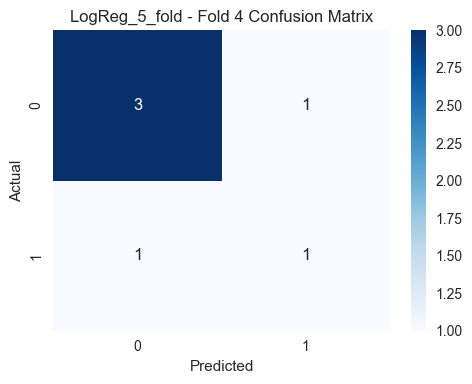

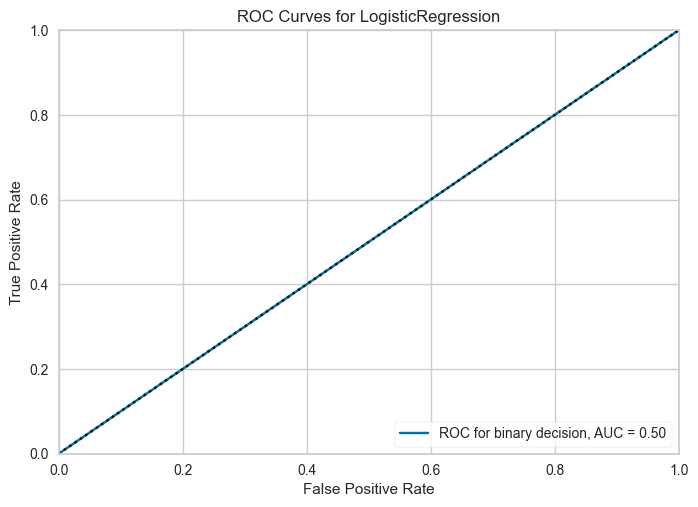


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:56:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



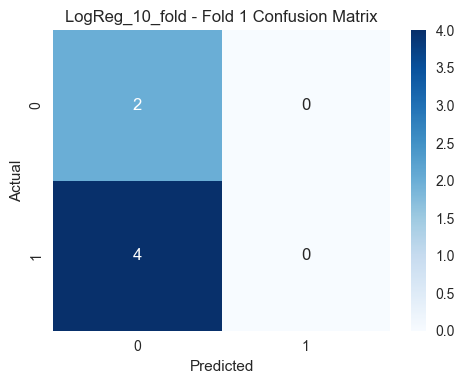

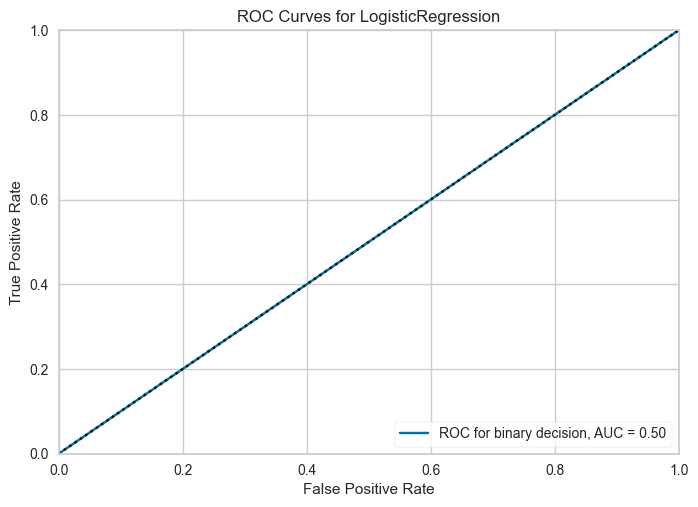


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



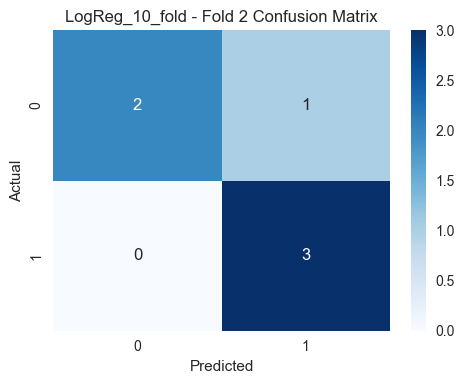

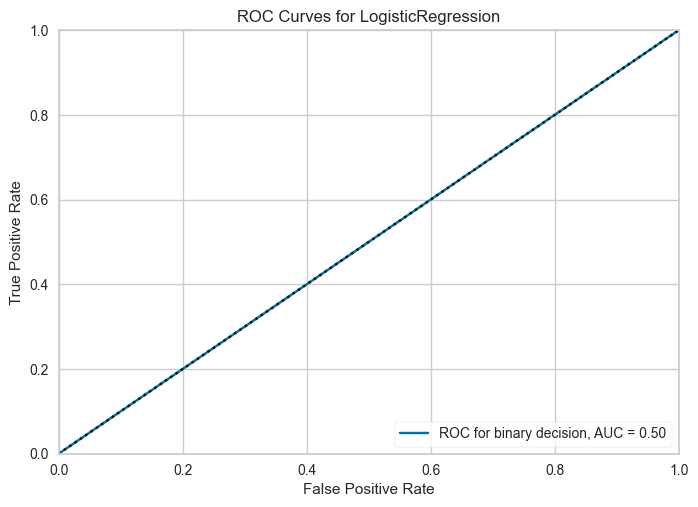


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.00      0.00      0.00         2

    accuracy                           0.50         6
   macro avg       0.30      0.38      0.33         6
weighted avg       0.40      0.50      0.44         6



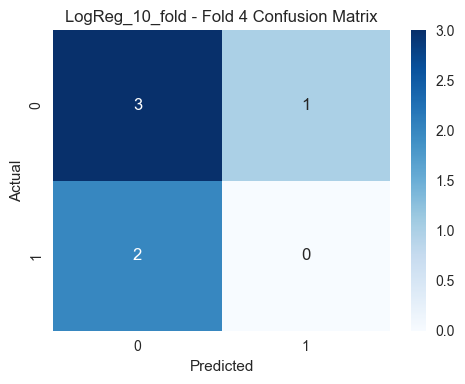

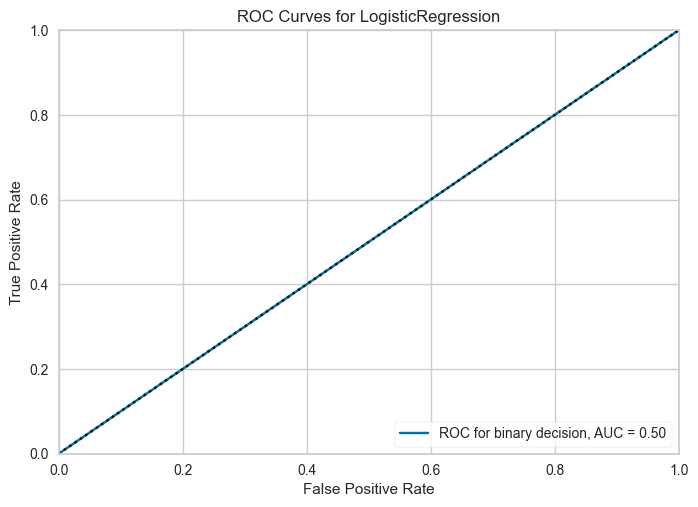


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:56:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



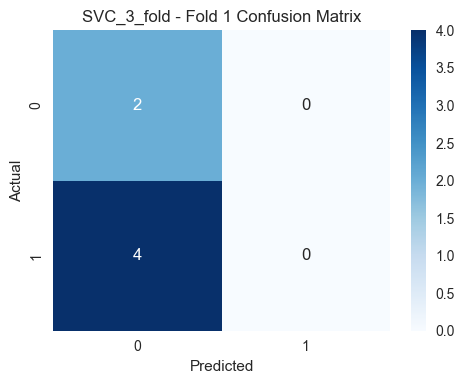

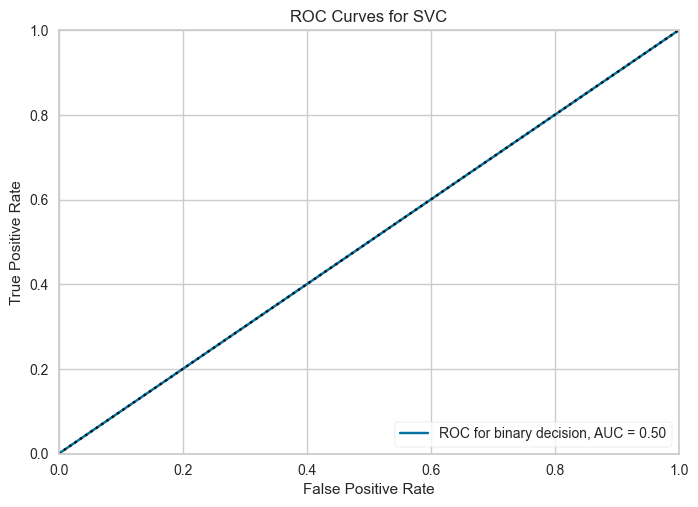


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



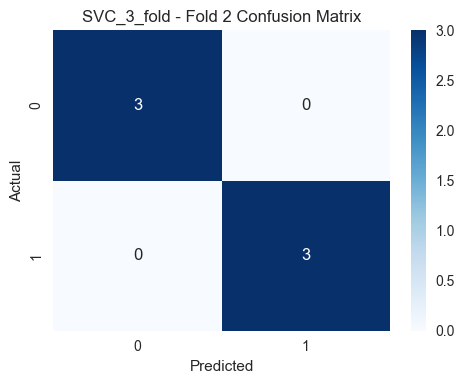

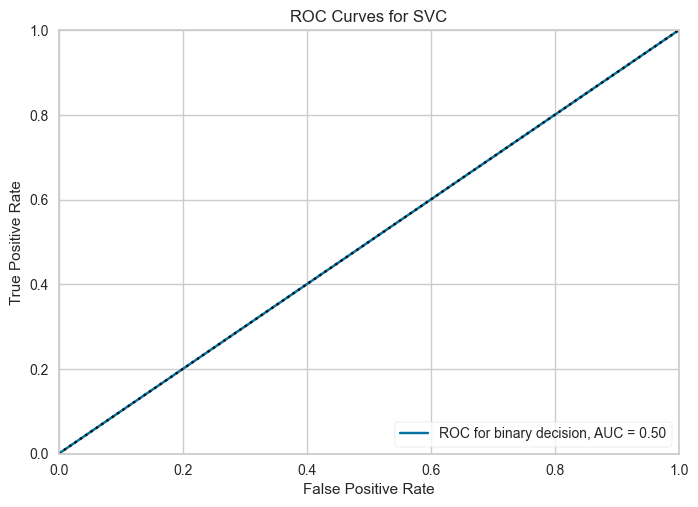


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



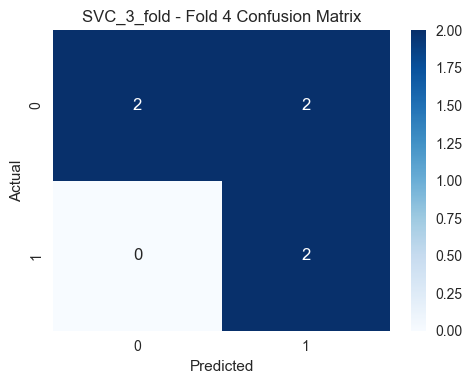

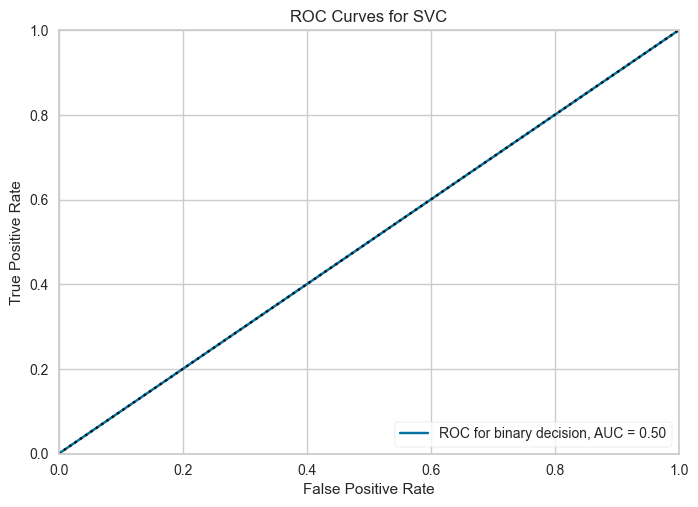


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:57:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



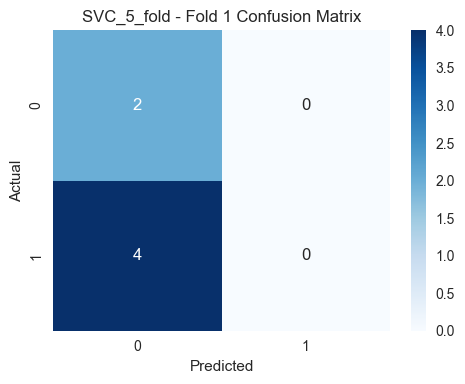

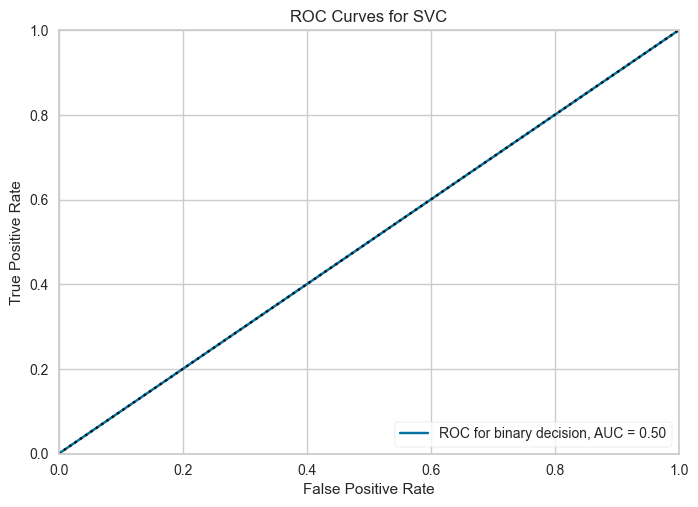


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



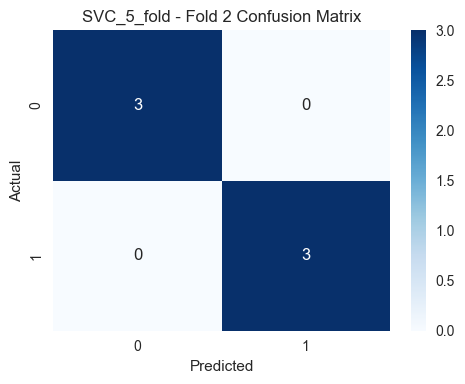

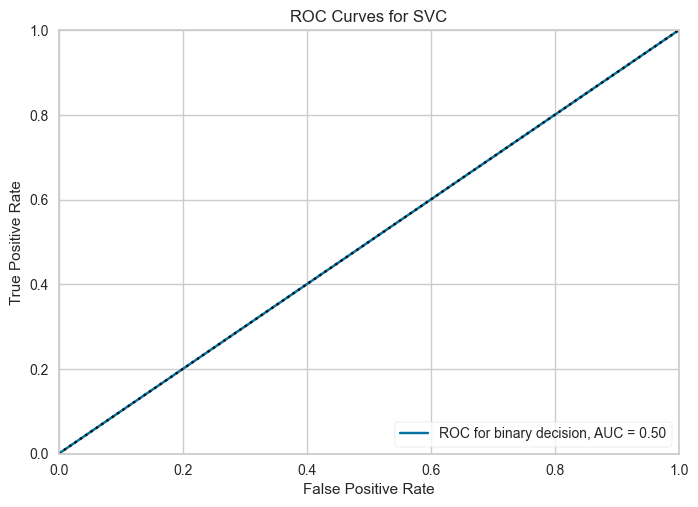


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



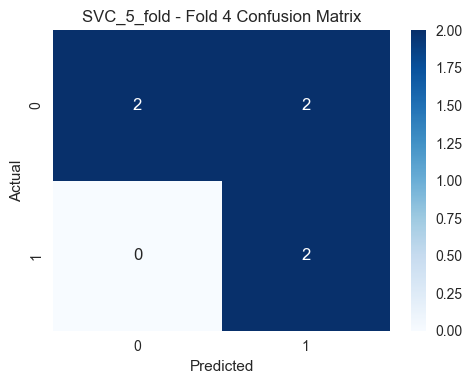

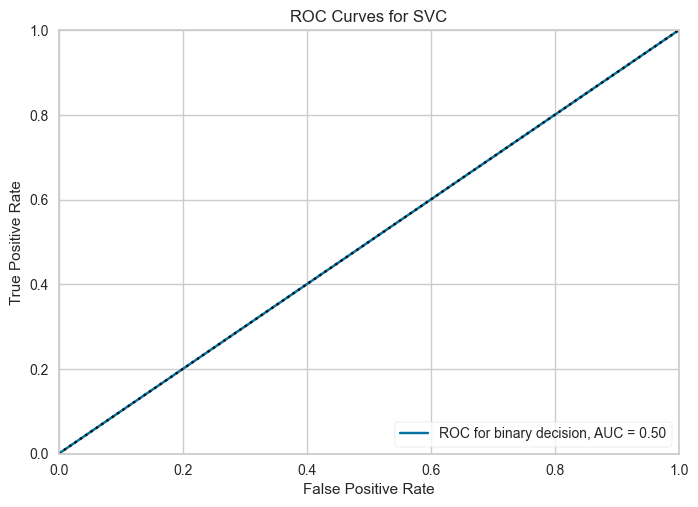


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:57:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



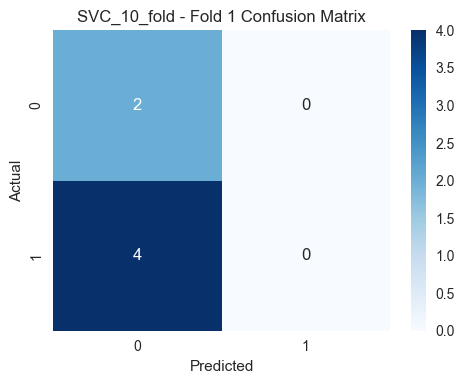

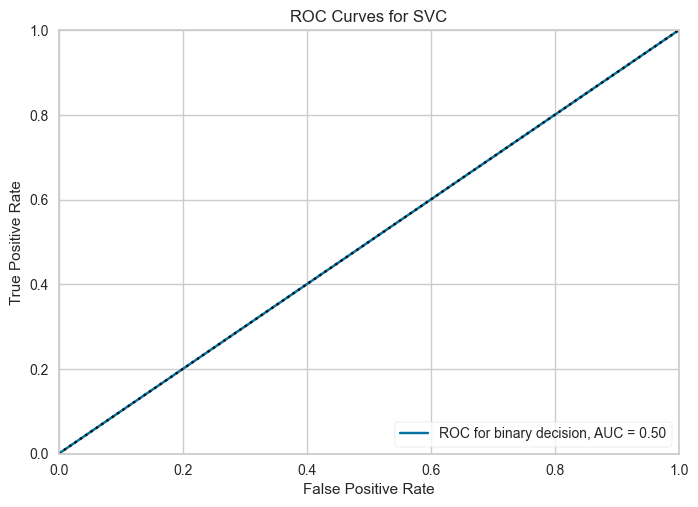


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



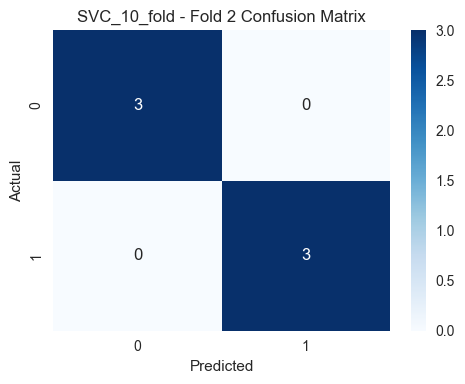

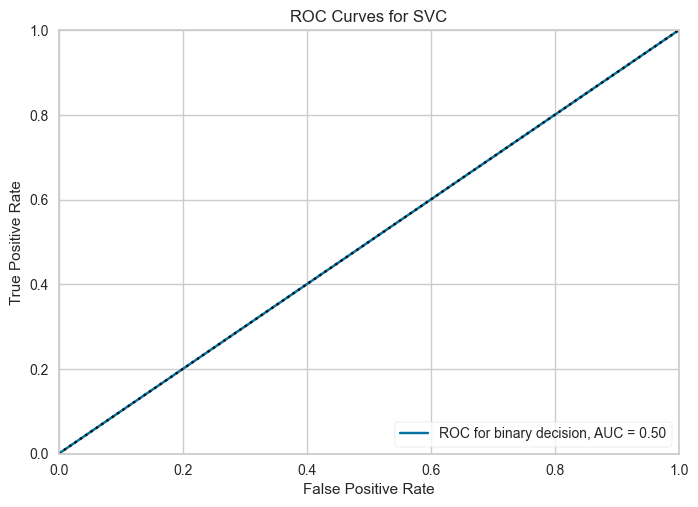


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



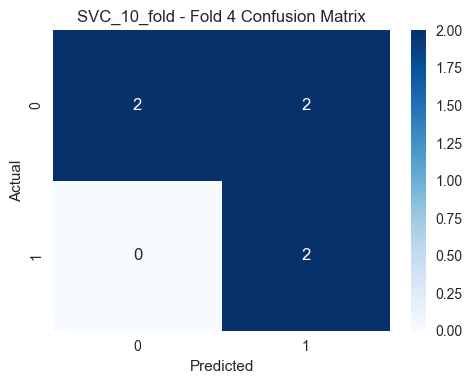

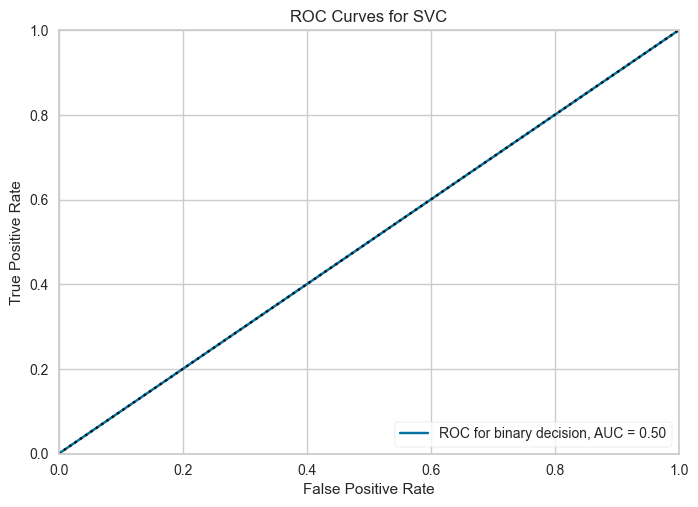


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:57:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



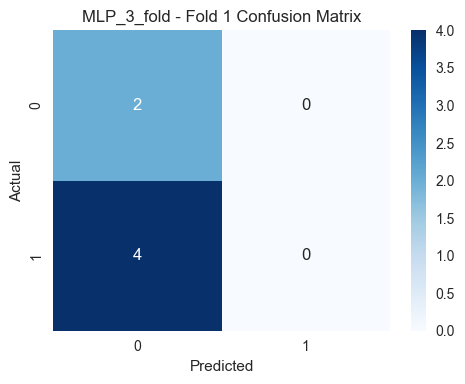

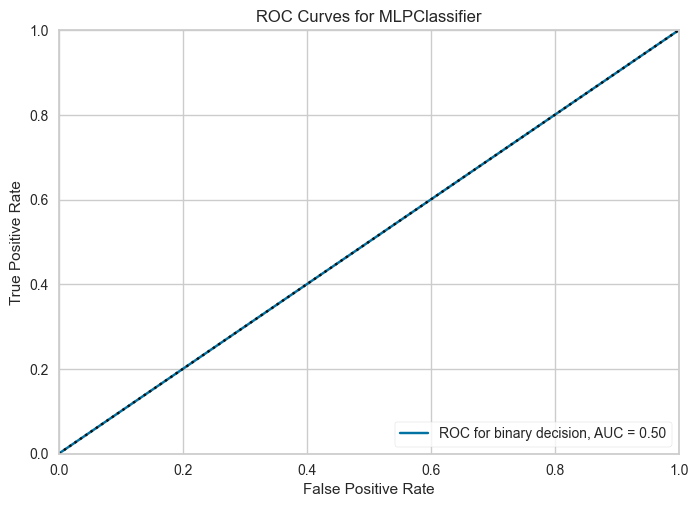


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



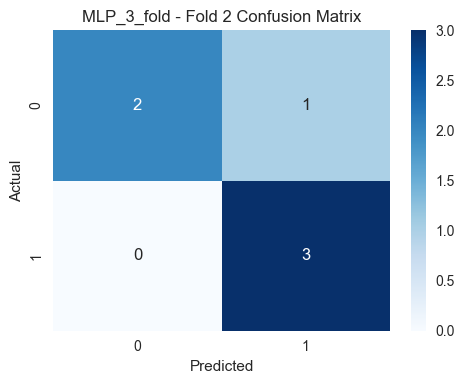

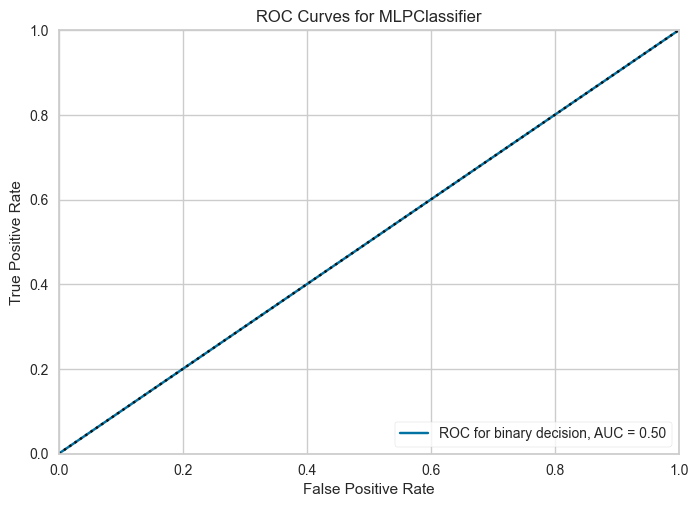


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



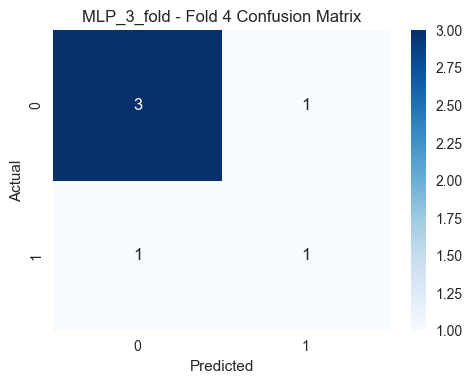

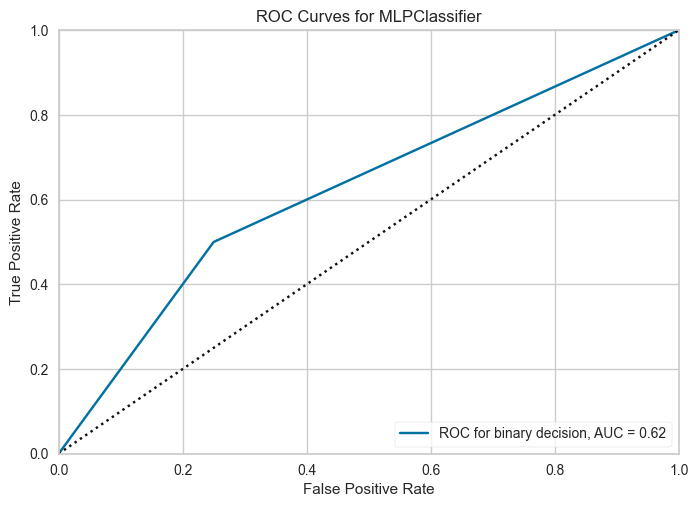


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:57:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



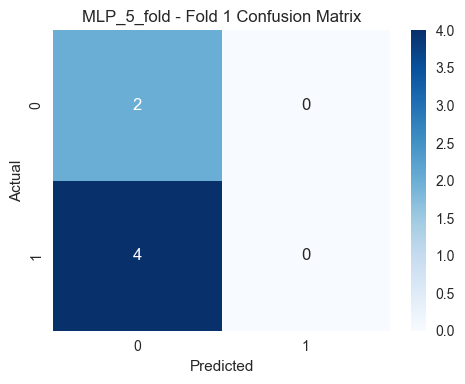

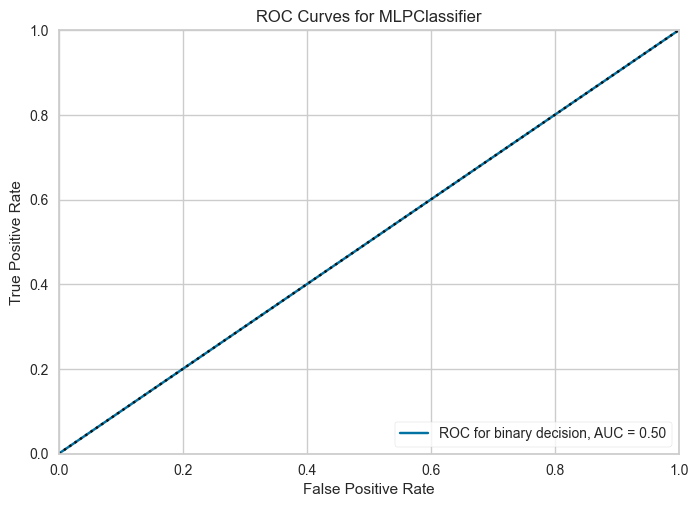


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



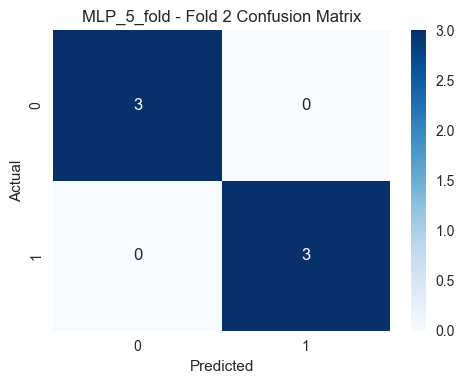

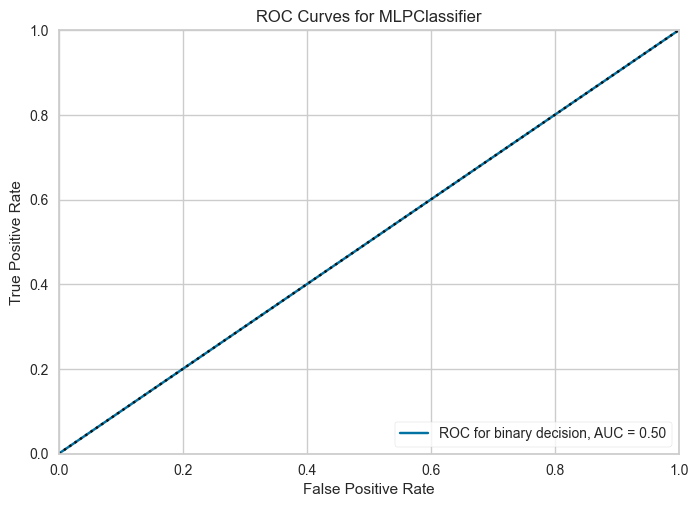


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.33      0.50      0.40         2

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



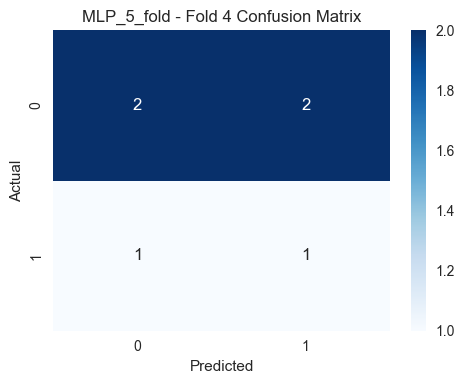

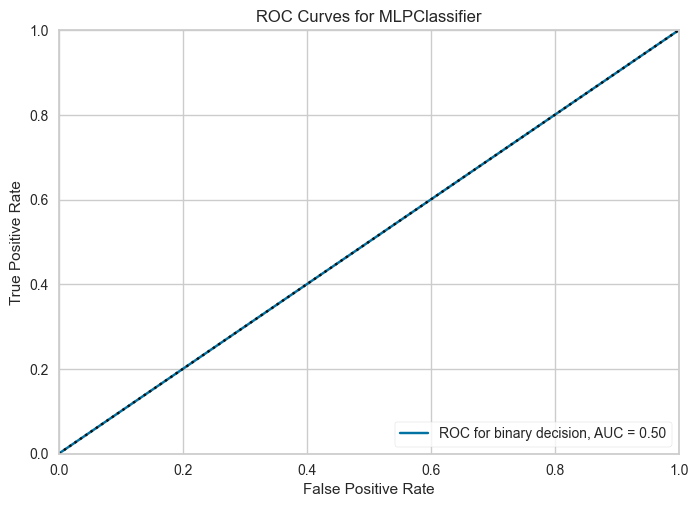


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:57:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



📊 Fold 1 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



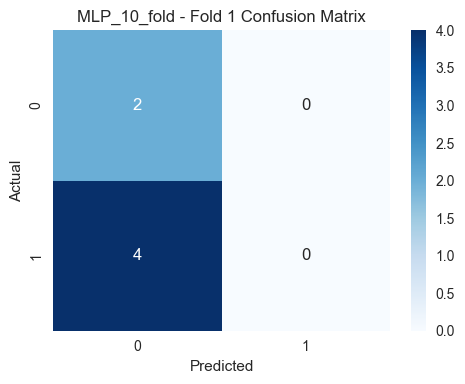

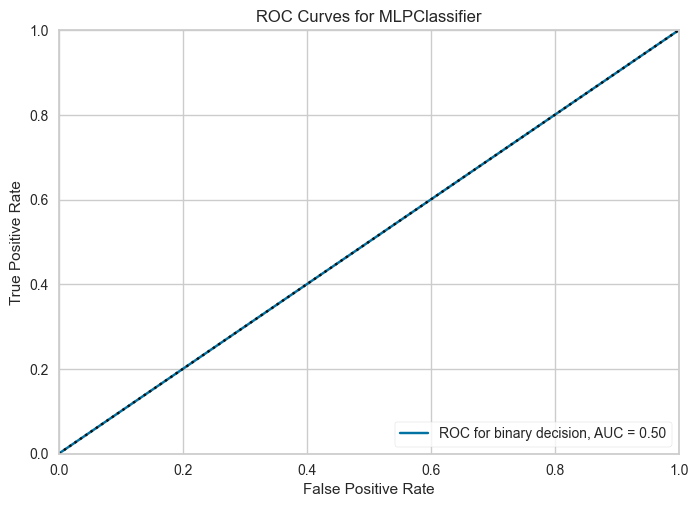


📊 Fold 2 Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



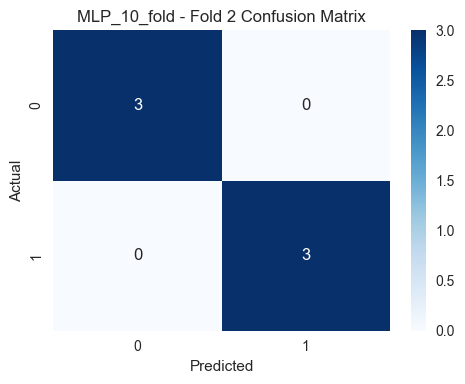

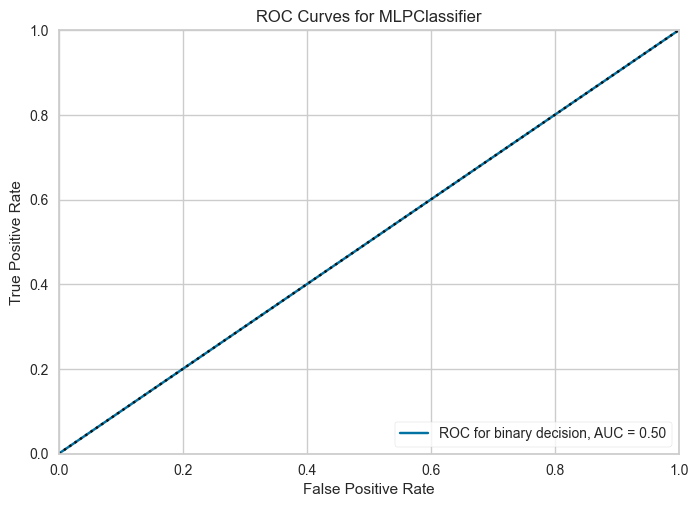


⚠️ Fold 3: Only one class present in y_test, skipping metrics.

📊 Fold 4 Confusion Matrix:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.33      0.50      0.40         2

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



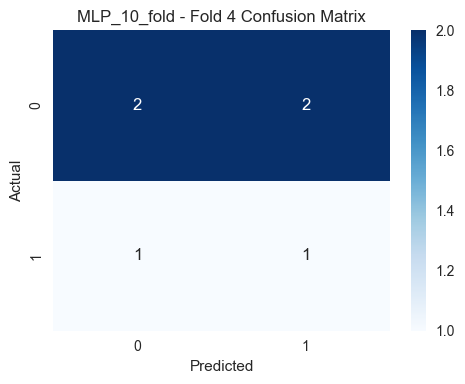

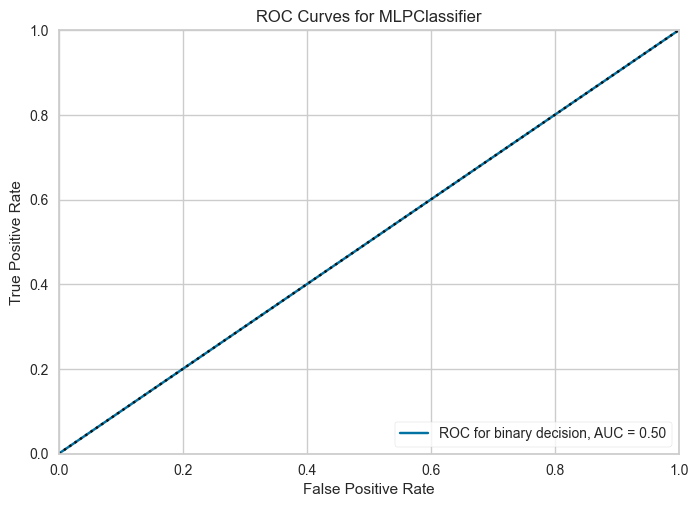


⚠️ Fold 5: Only one class present in y_test, skipping metrics.


2025/07/20 14:57:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [26]:
print("\n📈 Evaluasi Ulang Setelah Optimasi")
results_optimized = {}
for name, folds_dict in optimized_models.items():
    for fold_name, content in folds_dict.items():
        model = content['model']
        key = f"{name}_{fold_name}"
        results_optimized[key] = evaluate_model(model, X_combined, y, model_name=key)

In [27]:
df_optimized = pd.DataFrame(results_optimized).T
print("\n📈 Rangkuman Evaluasi Model (Tahap Optimasi):")
df_optimized


📈 Rangkuman Evaluasi Model (Tahap Optimasi):


accuracy_mean  precision_mean  recall_mean   f1_mean  \
RandomForest_3_fold        0.611111        0.416667     0.666667  0.507937   
RandomForest_5_fold        0.611111        0.416667     0.666667  0.507937   
RandomForest_10_fold       0.611111        0.416667     0.666667  0.507937   
XGBoost_3_fold             0.555556        0.383333     0.666667  0.476190   
XGBoost_5_fold             0.666667        0.472222     0.666667  0.552381   
XGBoost_10_fold            0.555556        0.383333     0.666667  0.476190   
LogReg_3_fold              0.555556        0.250000     0.333333  0.285714   
LogReg_5_fold              0.611111        0.416667     0.500000  0.452381   
LogReg_10_fold             0.555556        0.250000     0.333333  0.285714   
SVC_3_fold                 0.666667        0.500000     0.666667  0.555556   
SVC_5_fold                 0.666667        0.500000     0.666667  0.555556   
SVC_10_fold                0.666667        0.500000     0.666667  0.555556   
MLP_3_fold                 0.611111        0.416667     0.500000  0.452381   
MLP_5_fold                 0.611111        0.444444     0.500000  0.466667   
MLP_10_fold                0.611111        0.444444     0.500000  0.466667   

                      roc_auc_mean  directional_acc_mean  accuracy_std  \
RandomForest_3_fold       0.895833              0.500000      0.207870   
RandomForest_5_fold       0.833333              0.500000      0.207870   
RandomForest_10_fold      0.895833              0.500000      0.207870   
XGBoost_3_fold            0.833333              0.500000      0.207870   
XGBoost_5_fold            0.675926              0.611111      0.235702   
XGBoost_10_fold           0.833333              0.500000      0.207870   
LogReg_3_fold             0.800926              0.555556      0.207870   
LogReg_5_fold             0.796296              0.555556      0.207870   
LogReg_10_fold            0.800926              0.555556      0.207870   
SVC_3_fold                0.583333              0.611111      0.272166   
SVC_5_fold                0.583333              0.611111      0.272166   
SVC_10_fold               0.583333              0.611111      0.272166   
MLP_3_fold                0.791667              0.555556      0.207870   
MLP_5_fold                0.791667              0.611111      0.283279   
MLP_10_fold               0.791667              0.611111      0.283279   

                      precision_std  recall_std    f1_std  roc_auc_std  \
RandomForest_3_fold        0.311805    0.471405  0.367487     0.106230   
RandomForest_5_fold        0.311805    0.471405  0.367487     0.117851   
RandomForest_10_fold       0.311805    0.471405  0.367487     0.106230   
XGBoost_3_fold             0.306413    0.471405  0.356348     0.235702   
XGBoost_5_fold             0.335640    0.471405  0.391288     0.124914   
XGBoost_10_fold            0.306413    0.471405  0.356348     0.235702   
LogReg_3_fold              0.353553    0.471405  0.404061     0.153966   
LogReg_5_fold              0.311805    0.408248  0.351543     0.214367   
LogReg_10_fold             0.353553    0.471405  0.404061     0.153966   
SVC_3_fold                 0.408248    0.471405  0.415740     0.424918   
SVC_5_fold                 0.408248    0.471405  0.415740     0.424918   
SVC_10_fold                0.408248    0.471405  0.415740     0.424918   
MLP_3_fold                 0.311805    0.408248  0.351543     0.155902   
MLP_5_fold                 0.415740    0.408248  0.410961     0.294628   
MLP_10_fold                0.415740    0.408248  0.410961     0.294628   

                      directional_acc_std  
RandomForest_3_fold              0.136083  
RandomForest_5_fold              0.136083  
RandomForest_10_fold             0.136083  
XGBoost_3_fold                   0.136083  
XGBoost_5_fold                   0.078567  
XGBoost_10_fold                  0.136083  
LogReg_3_fold                    0.078567  
LogReg_5_fold                    0.078567  
LogReg_